<center><b><p><div style="margin: auto; padding: 15px; color:#000000; font-size: 20px">A1: Python Analysis - TEAM 02</b></div>
<br>
<center><div style="font-size: 14px"><center><i>Isabella Couto Carlos  | Anastasia Vasileva
<center><div style="font-size: 14px"><center><i>Hafez Bajammal | Alejandro Eguren | Gabriel Herrera

        
        
        
<hr style="width:100%; background-color: #D3D3D3; height:1px"></hr>

<div style="font-size: 14px"><center><b>Hult International Business School</div>
<div style="font-size: 14px"><center><b>BCH-7812 - Business Challenge #2 </div>
<div style="font-size: 14px"><center><b>Thomas Kurnicki</div>
<div style="font-size: 14px"><center><b>March 11, 2023</div>
<hr style="width:100%; background-color: #D3D3D3; height:1px"></hr>

In [1]:
# Importing Used Libraries  

# Core 

import numpy as np   # Used for numerical operations on arrays and matrices 
import pandas as pd   # Used for data manipulation and analysis 
import matplotlib.pyplot as plt   # Used for creating static and interactive visualizations 
import seaborn as sns   # Used for creating informative and attractive statistical graphics 
from imblearn.over_sampling import SMOTE   # Used for handling imbalanced datasets in machine learning 
import warnings   # Used for controlling warning messages 
import plotly.express as px   # Used for creating interactive visualizations 
import time   # Used for measuring execution time and delaying program execution 

# Sklearn 

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, StratifiedKFold   # Used for splitting data, hyperparameter tuning, and cross-validation 
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score, plot_confusion_matrix, plot_roc_curve, roc_curve   # Used for model evaluation 
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder   # Used for feature scaling and categorical encoding 
from sklearn.feature_selection import mutual_info_classif   # Used for feature selection 
from sklearn.decomposition import PCA   # Used for dimensionality reduction 
from sklearn.compose import ColumnTransformer   # Used for preprocessing data by applying different transformations to different columns 
from sklearn.pipeline import Pipeline   # Used for creating a sequence of preprocessing steps and a machine learning model 
from sklearn.impute import SimpleImputer   # Used for imputing missing values in data 
from sklearn.utils import resample   # Used for resampling datasets to balance the classes in imbalanced datasets 
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier   # Importing two ensemble classifiers 
from sklearn import linear_model   # Used for linear regression and logistic regression models 
from sklearn.linear_model import Perceptron   # Used for binary classification tasks 
from sklearn.linear_model import LogisticRegression   # Used for logistic regression models 
from sklearn.metrics import classification_report   # Used for generating a classification report for a machine learning model 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay   # Used for visualizing the performance of a classification model 


# Disable warnings
warnings.filterwarnings('ignore')

# Set seaborn style and font scale
sns.set(style='darkgrid', font_scale=1.4)

# Introduction

The Spaceship Titanic embarked on its inaugural voyage a month ago, carrying 12,970 emigrants from our solar system to three newly habitable exoplanets ('55 Cancri e', TRAPPIST-1e', 'PSO J318.5-22') orbiting nearby stars. While en route to its first destination, 55 Cancri E, the Spaceship collided with a spacetime anomaly concealed within a dust cloud. Despite the ship remaining intact, nearly half of the passengers were transported to an alternate dimension. 

This report aims to utilize the data obtained from the spaceship's damaged computer system to predict which passengers were affected by the anomaly and transported to the alternate dimension. 

The findings of this report will be instrumental in aiding the rescue mission to identify the lost passengers.

In [2]:
# Display Posters of the destinations of Spaceshiip Titanic 

from IPython.display import Image, HTML, display

img_A = 'https://64.media.tumblr.com/1ea3969f6c6536de46d6cb509a52c277/881607c26c7e2659-0e/s1280x1920/12deb5b30632b914b17defcdff882bc6868bff3a.jpg'
img_B = 'https://64.media.tumblr.com/ee73fa4862fa03419c77f875d5c0cf24/881607c26c7e2659-11/s1280x1920/c4c18057650b2d727dad1318576e780c230f36fe.jpg'
img_C = 'https://64.media.tumblr.com/f5b7be7ff9e71a1fbed2f138764ffa3d/881607c26c7e2659-36/s1280x1920/22e35e9d7f9216700837333c4bb4a877426d804d.jpg'

display(HTML("<table><tr><td><img src='" + img_A + "'></td><td><img src='" + img_B + "'></td><td><img src='" + img_C + "'></td></tr></table>"))

print("Image 1:EXOPLANET TRAVEL BUREAU Travel Poster: 55 Cancri e: Skies Sparkle Above a Never-Ending Ocean of Lava (NASA, n.d.-a)")
print("Image 2:EXOPLANET TRAVEL BUREAU Travel Poster: Planet hop from TRAPPIST-1e (NASA, n.d.-b) ")
print("Image 3:EXOPLANET TRAVEL BUREAU Travel Poster: PSO J318.5-22 Where the Nightlife Never Ends (NASA, n.d.-c)")

Image 1:EXOPLANET TRAVEL BUREAU Travel Poster: 55 Cancri e: Skies Sparkle Above a Never-Ending Ocean of Lava (NASA, n.d.-a)
Image 2:EXOPLANET TRAVEL BUREAU Travel Poster: Planet hop from TRAPPIST-1e (NASA, n.d.-b) 
Image 3:EXOPLANET TRAVEL BUREAU Travel Poster: PSO J318.5-22 Where the Nightlife Never Ends (NASA, n.d.-c)


## Sub Problem 1: How to infer missing data? (Filling the NaN)

This task involves identifying a suitable method to fill in missing data within the available dataset, with a focus on addressing NaN values.

## Sub Problem 2: How Finding the best model to predict if Passenger was Transported?

Did the passenger get transported to the other dimension?

## Sub Problem 3: Now what?

After the missing data has been filled, how can value be added for the Rescue Team through analysis?

# Results 

After analyzing the damaged computer records and inferring the missing data, different models were trained and tested to predict the transportation status of passengers with missing data. The model with the highest accuracy was chosen after comparison. The analysis revealed that individuals on the "S" side of the ship were more likely to be transported. Furthermore, passengers located on the lowest deck G, cabin section 4, were also more likely to be transported, possibly due to their proximity to the engines and turbines located directly beneath that section. It is believed that the Spaceship collided with a spacetime anomaly within a dust cloud on its way to 55 Cancri E, causing almost half of the passengers to be transported to an alternate dimension. The anomaly may have entered the ship through its turbines and engine section, affecting the area above it (Deck G, Section 4) primarily.

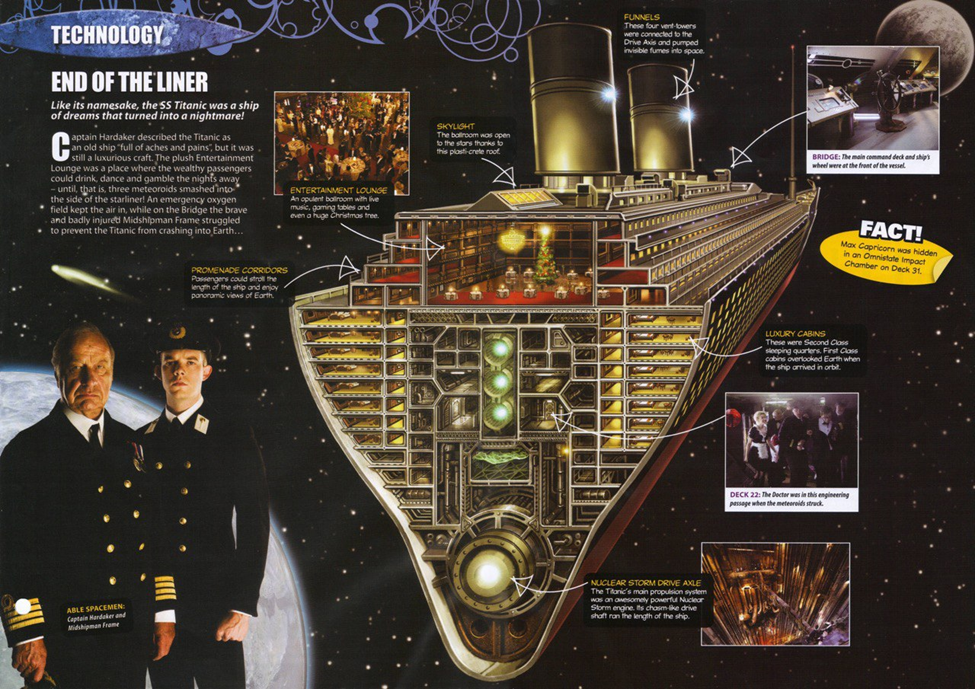

# Assumptions

The following assumptions were made: 

* It is assumed that both datasets "train" and "test" are part of the same flight. However, while the "training" data is entirely complete and was retrieved by the computer, the "testing" data is missing a specific feature, "Transported," because it was not recovered by the computer.


* It is assumed that the distribution of the spaceship is similar to the distribution of the original Titanic in terms of construction and layout. 


* Information on the "PassengerID" variable provides whether the passenger travels alone or within a group (XXXX - group the passenger is traveling with, YY- number within the group). Based on this information, it can be assumed that people from the same group are likely to come from the same Home Planet.


* After creating a new feature "Family," which means groups of individuals with the same last name, it can be assumed that people with missing Home Planets values are from the same planets as their family members.


* Based on the information provided, it can be assumed that people coming from Earth are mostly going to TRAPPIST-1e. Thus, it can be assumed that other passengers from Earth with missing destination value are also coming to TRAPPIST-1e.


* An assumption can be made based on the "Cabin" variable, which is formatted as "deck/num/side," with the side being either "Port" or "Starboard." It was observed through EDA that everyone who is in the same group is also on the same cabin side. Thus, individuals with missing side cabin information, who are part of a group with individuals with non-missing side cabin value, can be assumed to be located on the same side of the cabin as their group members. The same assumption applies for cabin deck and cabin number (as there is also a fairly-good correlation with group).


* The analysis showed that families tend to be on the same cabin side (and 77% of families are entirely on the same side). It means individuals with missing values for cabin side are likely to be located on the same cabin side as individuals with the same last names.


* The remaining missing values for Cabin side will be replaced with the P side because it has less passengers, and it is assumed that the spaceship is evenly distributed.


* Based on the analysis, a pattern was recognized that passengers from different home planets are more likely to be located on certain decks. Particularly, passengers from Mars are most likely to be in deck F, passengers from Europa traveling solo are likely to be in deck C and deck B otherwise, passengers from Earth are likely to be in deck G. Based on this, certain passengers' cabin location can be assumed based on their home planet and traveling status.


* According to the given information, individuals who were situated on the A, B, C, or T decks originated from Europa. Individuals on the G deck came from Earth. Those who were positioned on the D, E, or F decks originated from multiple planets. Given this, for passengers with non-missing cabin deck value and missing Home Planet, their origin planet can be assumed.


*  An assumption was made that if individuals have zero total expenditure, it indicates that they are in CryoSleep. Conversely, if an individual is in CryoSleep and has missing values for expenditures, it can be assumed that they have zero expenditure.


# Limitations

* <b> Limited Data: </b> The data available for analysis is limited and includes only certain variables. No information is available on the background of the passengers, the Starship Titanic, its trajectory, or interstellar weather conditions.


* <b>Missing Data: </b> According to the information provided, only partial data is available for the variables “HomePlanet”, “CryoSleep”, “Cabin”, “Destination”, “Age”, “VIP”, “RoomService”, “FoodCourt”, “ShoppingMall”, “Spa”, “VRDeck”, “Name” and most importantly, " Transported”. To address this issue, assumptions were made to infer what that information was. Refer to the section Assumptions for further information.


* <b>Model Accuracy: </b>  The "Transported" feature is crucial to aid the rescue mission in identifying the lost passengers. Unfortunately, this variable was not recorded for a portion of the data during data collection. To address this issue, a model was developed to predict the "Transported” feature with an accuracy of 80.75%.
<b><i>DISCLAIMER: These predictions are not 100% accurate, and the success of the rescue mission may be affected. </i></b>  


# Importing Data

## Data Sets: training_dataset

In [3]:
# importing the training dataset

path             = "./"
training_dataset = "train.csv"


# reading in the .csv file with pandas
titanic_train    = pd.read_csv(filepath_or_buffer = path + training_dataset)

# create Original BACKUP
titanic_train_original = titanic_train.copy()

# checking basic info about the dataset
#titanic_train.info(verbose = True)
#titanic_train.head()


## Importing Data Sets: testing_dataset

In [4]:
# importing the test dataset

path             = "./"
testing_dataset  = 'test.csv'

# importing the testing dataset
titanic_test = pd.read_csv( filepath_or_buffer = path + testing_dataset)

# create Original BACKUP
titanic_test_original = titanic_test.copy()

# checking basic info about the dataset
#titanic_test.info(verbose = True)
#titanic_test.head()

#  Exploratory Data Analysis (EDA)

## Variable Description


<b>PassengerId:</b> A unique ID assigned to each passenger in the format of XXXX_YY, where XXXX represents the group and YY represents the number of the passenger in the group.

<b>HomePlanet:</b> The planet from which the passenger is traveling.

<b>CryoSleep:</b> Indicates whether the passenger will be in deep sleep throughout the voyage, during which the body is stored at very low temperatures to preserve it.

<b>Cabin:</b> The cabin number assigned to the passenger, in the format of XX/YY/ZZ, where XX represents the deck, YY represents the number, and ZZ represents the side.

<b>Destination:</b> The planet to which the passenger is traveling.

<b>Age:</b> The age of the passenger.

<b>VIP:</b> Indicates whether the passenger has availed the VIP service.

<b>RoomService:</b> The amount spent by the passenger on room service.

<b>FoodCourt:</b> The amount spent by the passenger in the food court.

<b>ShoppingMall:</b> The amount spent by the passenger in the shopping mall.

<b>Spa:</b> The amount spent by the passenger at the spa.

<b>VRDeck:</b> The amount spent by the passenger in the virtual reality deck.

<b>Name:</b> The full name of the passenger.

<b>Transported:</b> Indicates whether the passenger was transported to an alternate dimension.              

## Missing Values

In [5]:
# create Table 01 - Total Missing Values 

table_2 = pd.DataFrame(titanic_train_original.isna().sum(), columns=['Train']).astype(int)
table_2['Variables'] = table_2.index
table_2.reset_index(drop=True, inplace=True)

#print(table_2)
table_3 = pd.DataFrame(titanic_test_original.isna().sum(), columns=['Test']).astype(int)
table_3['Variables'] = table_3.index
table_3.reset_index(drop=True, inplace=True)
#print(table_3)

table_4 = pd.merge(table_2, table_3, how="left", on=["Variables"])
table_4['Total'] = table_4['Train'] + table_4['Test']

# drop the second row (index label = 1)

table_4 = table_4.drop(13)

table_4['Train'] = table_4['Train'].astype(int)
table_4['Test'] = table_4['Test'].astype(int)
table_4['Total'] = table_4['Total'].astype(int)

#print(table_4)
#list(titanic_train.isna().sum())

data_table = table_4[['Variables','Train','Test','Total']]

# Print Table 01 - Total Missing Values 

print("""Table 01 - Total Missing Values
      
      """)

print(data_table)

print(f"""
           Total:  {table_4['Train'].sum()}  {table_4['Test'].sum()}   {table_4['Total'].sum()}""")

print("""

Source: Spaceship Titanic's Computer Records""")

Table 01 - Total Missing Values
      
      
       Variables  Train  Test  Total
0    PassengerId      0     0      0
1     HomePlanet    201    87    288
2      CryoSleep    217    93    310
3          Cabin    199   100    299
4    Destination    182    92    274
5            Age    179    91    270
6            VIP    203    93    296
7    RoomService    181    82    263
8      FoodCourt    183   106    289
9   ShoppingMall    208    98    306
10           Spa    183   101    284
11        VRDeck    188    80    268
12          Name    200    94    294

           Total:  2324  1117   3441


Source: Spaceship Titanic's Computer Records


## Distribution of passengers affected by the anomaly

Graph 01 - Percentage of Passengers Affected by the Anomaly


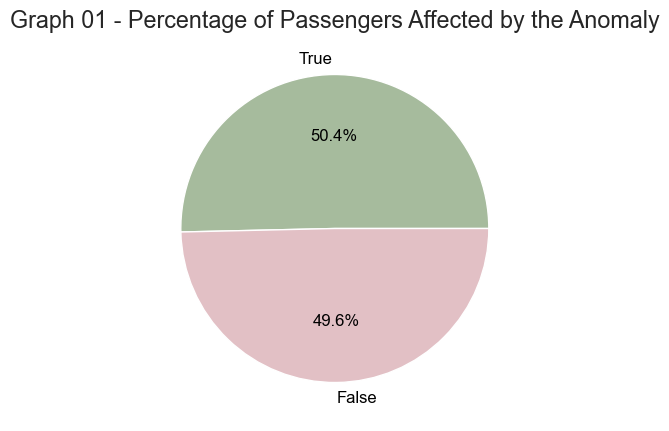

Source: Spaceship Titanic's Computer Records


In [6]:
# Create Graph 01 - Percentage of Passengers Affected by the Anomaly

# Set style to seaborn
sns.set_style("white")

# Create figure and set size
plt.figure(figsize=(5, 5))

# Set color palette
colors = ["#A6BB9D", "#E2C0C5"]
labels = ['True', 'False']

# Create pie plot
titanic_train["Transported"].value_counts().plot.pie(
    labels = labels,
    autopct="%1.1f%%",
    textprops={"fontsize": 12, "color": "black"},
    colors=colors,
    ylabel=''
).set_title("Graph 01 - Percentage of Passengers Affected by the Anomaly")

# Show plot

print ("Graph 01 - Percentage of Passengers Affected by the Anomaly")
plt.show()
print("Source: Spaceship Titanic's Computer Records")

<b> Insight from Percentage of Passengers Affected by the Anomaly</b>

From this chart we can see that the share of passengers that were and were not transported to another dimension is almost even.

### Continuous features

#### Distribution of Passengers' Age by Transportation Status

Graph 02 - Distribution of Passengers' Age by Transportation Status 


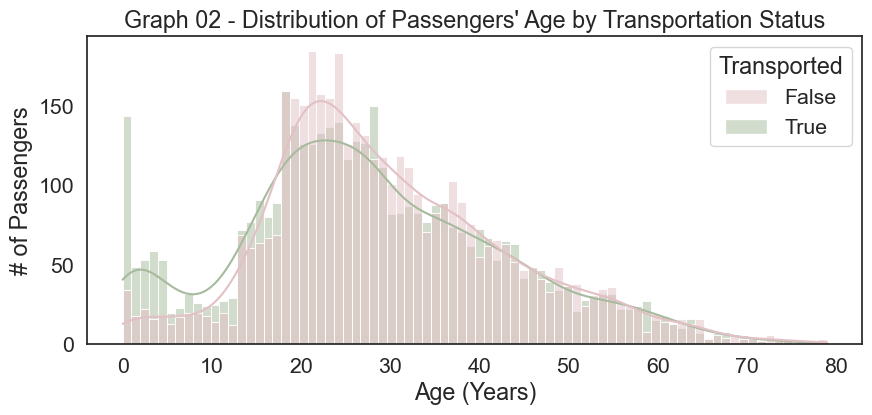

Source: Spaceship Titanic's Computer Records


In [7]:
# Create Graph 02 - Distribution of Passengers' Age by Transportation Status 

# Distribution of Passengers' Age by Transportation Status

# Figure size
plt.figure(figsize=(10,4))

# Histogram
sns.histplot(data=titanic_train,
             x='Age',
             bins=80,
             hue='Transported',
             kde= True,
             palette = ["#E2C0C5","#A6BB9D"])


plt.xlabel('Age (Years)')
plt.ylabel('# of Passengers')
plt.title("Graph 02 - Distribution of Passengers' Age by Transportation Status")


print ("Graph 02 - Distribution of Passengers' Age by Transportation Status ")
plt.show()

print("Source: Spaceship Titanic's Computer Records")

<b> Insights from Distribution of Passengers' Age by Transportation Status </b>

In this chart we can see the relation between the transportation/no transportation and the age of the passengers. We can assume as following:

* Passengers from 0-18: more likely to be transported 
* Passengers from 18-40: unlikely to be transported
* Passengers +40: age is not a relevant factor

#### Expenditure features

Graph 03 - Distribution of Expenditure features for visual analysis 


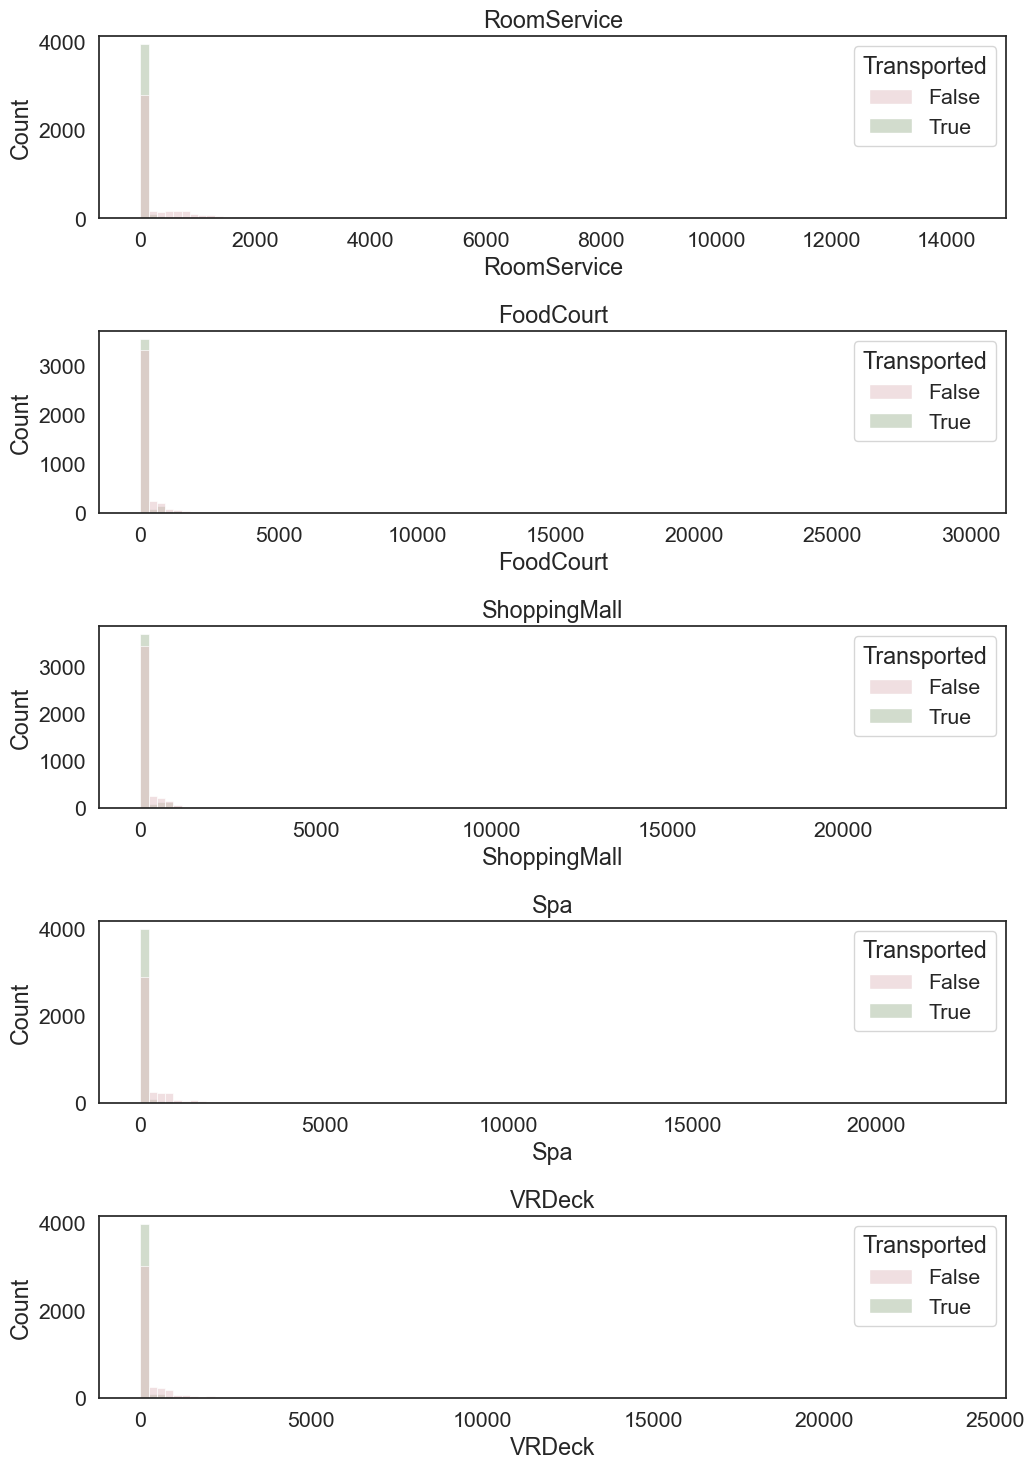

Source: Spaceship Titanic's Computer Records


In [8]:
# Plot Expenditure features for visual analysis.

# Expenditure features
Expend = ["RoomService",
          "FoodCourt",
          "ShoppingMall",
          "Spa",
          "VRDeck"]

# Plot expenditure features
fig = plt.figure(figsize=(20, 15))
for i, var_name in enumerate(Expend):
    # Left plot
    ax = fig.add_subplot(5, 2, 2 * i + 1)
    sns.histplot(data=titanic_train,
                 x=var_name,
                 axes=ax,
                 bins=100,
                 hue='Transported',
                 kde= False,
                 palette = ["#E2C0C5","#A6BB9D"])
    ax.set_title(var_name)
    
fig.tight_layout()  # Improves appearance a bit

print ("Graph 03 - Distribution of Expenditure features for visual analysis ")

plt.show()

print("Source: Spaceship Titanic's Computer Records")

<b> Insights from Expenditure features </b>

In [9]:
# Print insight from Expenditure features

spent_money = titanic_train[(titanic_train["RoomService"]==0) &
              (titanic_train["FoodCourt"]==0) &
              (titanic_train["ShoppingMall"]==0) &
              (titanic_train["Spa"]==0) &
              (titanic_train["VRDeck"]==0)]['PassengerId'].count()

didnt_spent_money = titanic_train[(titanic_train["RoomService"]!=0) |
              (titanic_train["FoodCourt"]!=0) |
              (titanic_train["ShoppingMall"]!=0) |
              (titanic_train["Spa"]!=0) |
              (titanic_train["VRDeck"]!=0)]['PassengerId'].count()

print(f"""The number of passengers that did not spent any money was {spent_money}.""")
     
print(f"""While the number of passengers that did spent money was {didnt_spent_money}.
""")

print(f"""That means that {spent_money/(spent_money+didnt_spent_money):.1%} did not spend any money, which is a significant number.""")

The number of passengers that did not spent any money was 3247.
While the number of passengers that did spent money was 5446.

That means that 37.4% did not spend any money, which is a significant number.


<b> Explanation </b>

From this insight, we suggest the creation of a binary feature to indicate if the passenger spent money or not. For this, we are adding a feature that is the sum of all five amenities. We are going to evaluate the skew in the data, and is is too high, we are going to make a logarithmic transformation.

## Categorical features

Graph 04 - Categorical features for visual analysis 


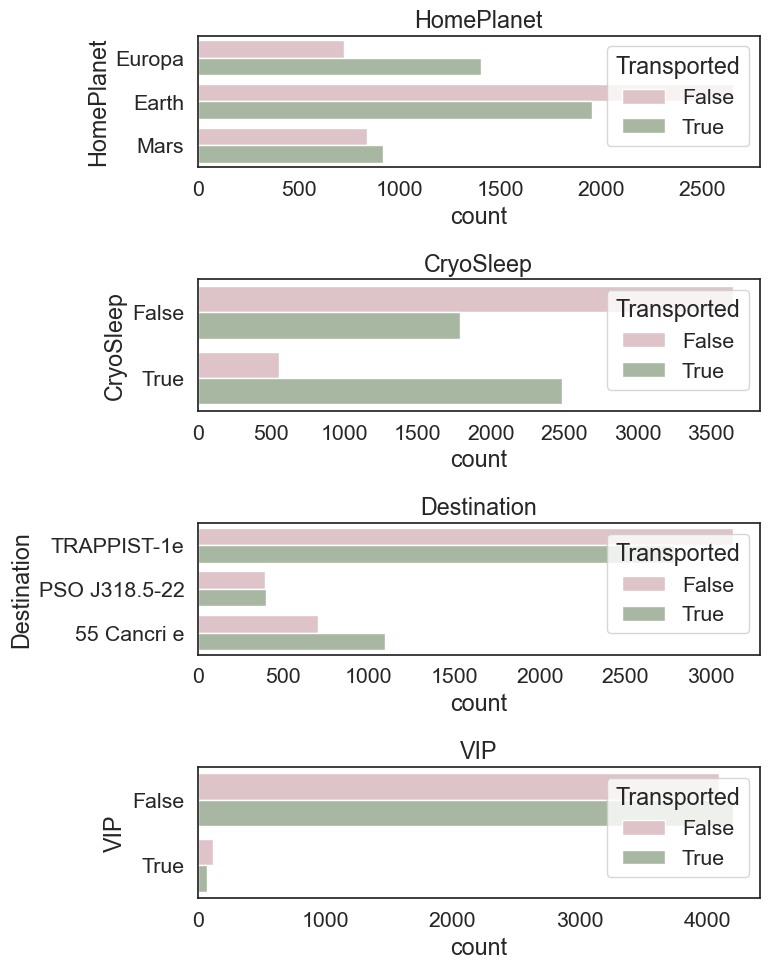

Source: Spaceship Titanic's Computer Records


In [10]:
# Plot Categorical features for visual analysis


cat_feats=['HomePlanet',
           'CryoSleep',
           'Destination',
           'VIP']

# Plot categorical features
fig=plt.figure(figsize=(8,10))
for i, var_name in enumerate(cat_feats):
    ax=fig.add_subplot(4,1,i+1)
    sns.countplot(data=titanic_train,
                  y=var_name,
                  axes=ax,
                  palette = ["#E2C0C5","#A6BB9D"],
                  hue='Transported')
    ax.set_title(var_name)

# Separate charts
fig.tight_layout()

print ("Graph 04 - Categorical features for visual analysis ")

plt.show()

print("Source: Spaceship Titanic's Computer Records")


<b> Insights from Categorical features </b>

Analyzing these five features we can conclude that:

- CryoSleep is relevant/affects the transportation feature
- VIP is not relevant/affects the transportation feature

## Qualitative features

### Description of the qualitative features

As explained in the Variable Description section and showed above, we have as the following:

- The "PassengerId" feature contains the "Group" and "Group Size"
- The "Cabin" feature contains the deck, number and side
- The "Name" feature contains name and surname. The surname can be used to identify the families.

In [11]:
# Create table of sample of Qualitative features 

qual_feats=['PassengerId',
            'Cabin' ,
            'Name']

# Print table of sample of Qualitative features 

print("""Table 02 - Sample of Qualitative features format

""")

print(titanic_train[qual_feats].head())

print("""

Source: Spaceship Titanic's Computer Records""")

Table 02 - Sample of Qualitative features format


  PassengerId  Cabin               Name
0     0001_01  B/0/P    Maham Ofracculy
1     0002_01  F/0/S       Juanna Vines
2     0003_01  A/0/S      Altark Susent
3     0003_02  A/0/S       Solam Susent
4     0004_01  F/1/S  Willy Santantines


Source: Spaceship Titanic's Computer Records


Graph 05 - Total Expenditure by Age


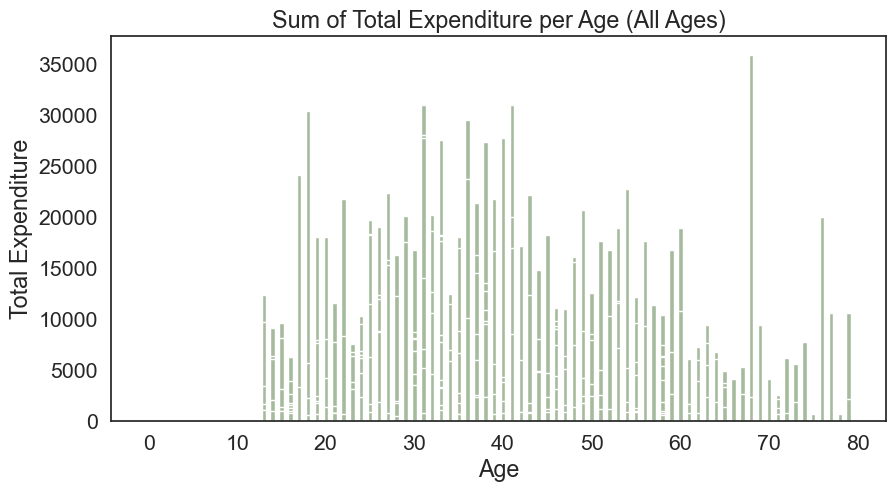

Source: Spaceship Titanic's Computer Records


In [12]:
# Create Graph 05 - Total Expenditure by Age  

# Code to demontstrate that for passengers below '13', the total expenditure is = '0'
titanic_train["Expend"] = (
    titanic_train["RoomService"]
    + titanic_train["FoodCourt"]
    + titanic_train["ShoppingMall"]
    + titanic_train["Spa"]
    + titanic_train["VRDeck"]
)

# creating the dataset
data = titanic_train
x_var = titanic_train["Age"]
y_var = titanic_train["Expend"]

fig = plt.figure(figsize=(10, 5))

# creating the bar plot
plt.bar(x_var,
        y_var,
        color="#A6BB9D",
        width=0.5)

plt.xlabel("Age")
plt.ylabel("Total Expenditure")
plt.title("Sum of Total Expenditure per Age (All Ages)")


# Print Graph 05 - Total Expenditure by Age 
print ("Graph 05 - Total Expenditure by Age")
plt.show()
print("Source: Spaceship Titanic's Computer Records")

Graph 06 - Total Expenditure by Age of minors ( 0 - 17) 


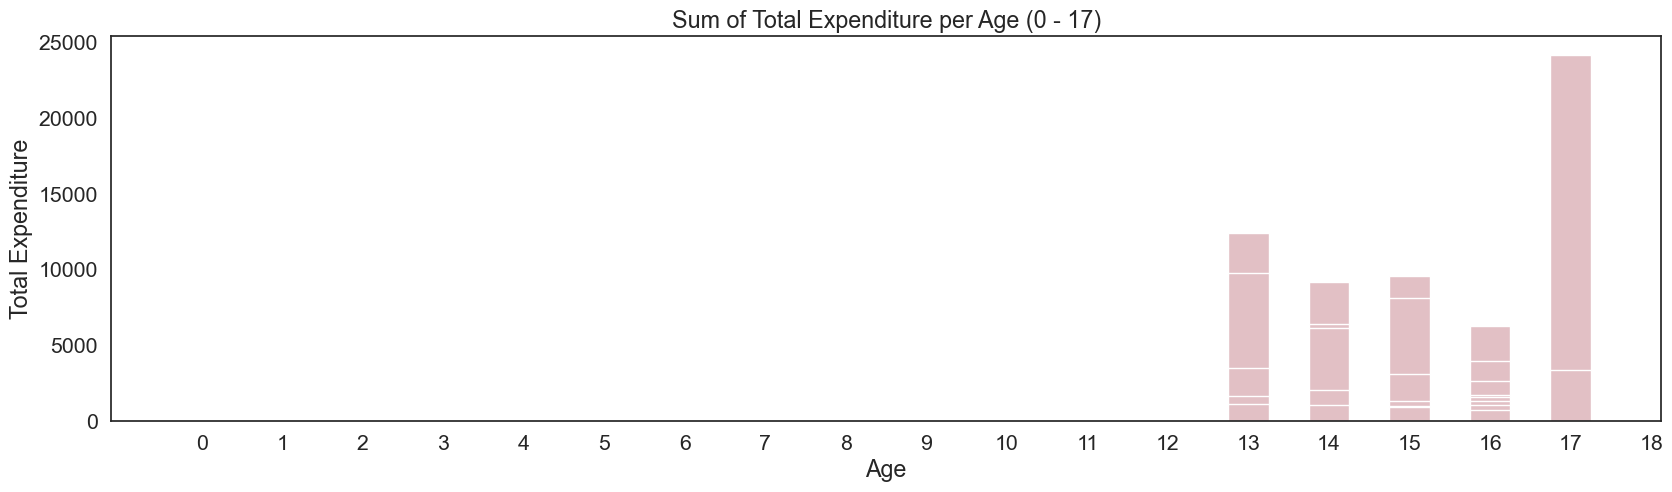

Source: Spaceship Titanic's Computer Records


In [13]:
# Create Graph 06 - Total Expenditure by Age of minors 

# ZOOM INFiltering age < 15

# creating the dataset
x_var2 = titanic_train[titanic_train["Age"] < 18]["Age"]
y_var = titanic_train[titanic_train["Age"] < 18]["Expend"]

fig = plt.figure(figsize=(20, 5))

# creating the bar plot
plt.bar(x_var2,
        y_var,
        color="#E2C0C5",
        width=0.5)

plt.xlabel("Age")
plt.ylabel("Total Expenditure")
plt.title("Sum of Total Expenditure per Age (0 - 17)")

# set x-axis ticks to show only numbers from 0 to 18
plt.xticks(range(0, 19))


# Print Graph 06 - Total Expenditure by Age of minors 
print ("Graph 06 - Total Expenditure by Age of minors ( 0 - 17) ")
plt.show()
print("Source: Spaceship Titanic's Computer Records")


<b> Insights from Age grouping </b>

This charts show us that no passenger under 12 years old has expends. We can use this when grouping the ages.

## Feature Engineering

### Age Group

#### Explanation 

- <b>Kids</b> (0 < Age <= 12): From the graph "Distribution of Passengers Age by Transported Status", people below the age 'of 12' are most likely to be transported. 
<br>
<br>
- <b>Teens</b> (13 < Age <= 17): From the graph "Distribution of Passengers Age by Transported Status", people between the ages of 13 to 17 are more likely to be transported.  
<br>
<br>
- <b>Adults</b> (18 < Age <= 40): From the graph "Distribution of Passengers Age by Transported Status", people between the age of 18 and 40 are less likely to be transported. 
<br>
<br>
- <b>Seniors</b> (Age >= 41): From the graph "Distribution of Passengers Age by Transported Status", people above the age of 40 have almost a fair chance of being transported or not.


In [14]:
# Create Age Group Feature

# New feature: Age Group - Training Set
titanic_train["Age Group"] = np.nan
titanic_train.loc[titanic_train["Age"] <= 12, "Age Group"] = "Kids"
titanic_train.loc[(titanic_train["Age"] > 12) & (titanic_train["Age"] < 18), "Age Group"] = "Teens"
titanic_train.loc[(titanic_train["Age"] >= 18) & (titanic_train["Age"] <= 40), "Age Group"] = "Adults"
titanic_train.loc[titanic_train["Age"] > 40, "Age Group"] = "Seniors"

# New feature: Age Group - Test Set
titanic_test["Age Group"] = np.nan
titanic_test.loc[titanic_test["Age"] <= 12, "Age Group"] = "Kids"
titanic_test.loc[(titanic_test["Age"] > 12) & (titanic_train["Age"] < 18), "Age Group"] = "Teens"
titanic_test.loc[(titanic_test["Age"] >= 18) & (titanic_train["Age"] <= 40), "Age Group"] = "Adults"
titanic_test.loc[titanic_test["Age"] > 40, "Age Group"] = "Seniors"


Graph 07 - Distribution of Transported by Age Group


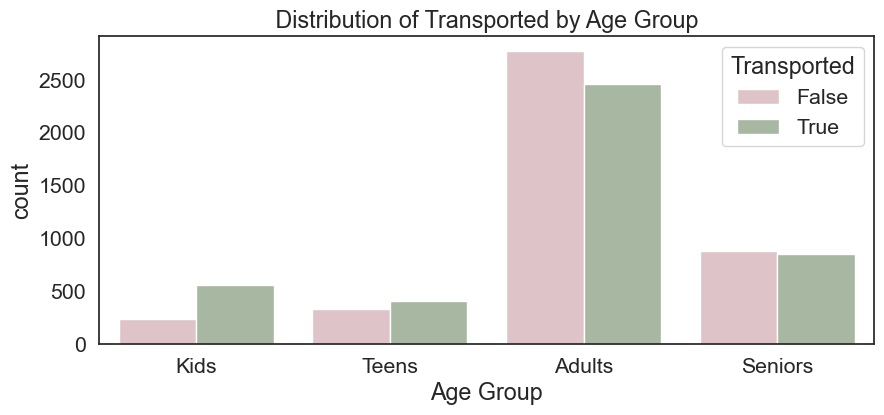

Source: Spaceship Titanic's Computer Records


In [15]:
# Create Graph 07 - Total Expenditure by Age of minors 

# Plot distribution of new features
plt.figure(figsize=(10,4))
g=sns.countplot(data=titanic_train,
                x='Age Group',
                palette = ["#E2C0C5","#A6BB9D"],
                hue='Transported',
                order=['Kids',
                       'Teens',
                       'Adults',
                       'Seniors'])

plt.title(' Distribution of Transported by Age Group ')

# Print Graph 07 - Total Expenditure by Age of minors 
print ("Graph 07 - Distribution of Transported by Age Group")
plt.show()
print("Source: Spaceship Titanic's Computer Records")


### Expenditure

#### Explanation

'Expend' -  the total expenditure by passenger.
'No_spending' - passengers with no expenditure.

In [16]:
#Calculate total expenditure and identify passengers with no expenditure.

# New features - training set
titanic_train['Expend']=titanic_train[Expend].sum(axis=1)
titanic_train['No_spending']=(titanic_train['Expend']==0).astype(int)

# New features - test set
titanic_test['Expend']=titanic_test[Expend].sum(axis=1)
titanic_test['No_spending']=(titanic_test['Expend']==0).astype(int)

### Passenger group and group size

#### Explanation of New features from 'PassengerId':

<br>

As we saw in the variable description:

- <b>"PassengerId"</b> is set as XXXX_YY where XXXX = group and YY = number in the group

<br>

Therefore, we are going to separate it as following:

- <b>'Group'</b>: Group of passengers refered as 'XXXX'.

- <b>'Group_size'</b>: Number of passengers within a group, caclulated as count of items of 'YY'.

- <b>'Solo'</b>: Binary: Is the passenger alone or part of a larger group (0 = part of group, 1 = 'solo')

In [17]:
# Extract passenger group and group size from PassengerId 

# New feature - Group
titanic_train["Group"] = (
    titanic_train["PassengerId"].apply(lambda x: x.split("_")[0]).astype(int)
)
titanic_test["Group"] = (
    titanic_test["PassengerId"].apply(lambda x: x.split("_")[0]).astype(int)
)

# New feature - Group size
titanic_train["Group_size"] = titanic_train["Group"].map(
    lambda x: pd.concat([titanic_train["Group"], titanic_test["Group"]]).value_counts()[
        x
    ]
)
titanic_test["Group_size"] = titanic_test["Group"].map(
    lambda x: pd.concat([titanic_train["Group"], titanic_test["Group"]]).value_counts()[
        x
    ]
)

# Extract passenger group and group size from PassengerId
# New feature
titanic_train["Solo"] = (titanic_train["Group_size"] == 1).astype(int)
titanic_test["Solo"] = (titanic_test["Group_size"] == 1).astype(int)

Graph 08 - Distribution of Passengers travelling alone


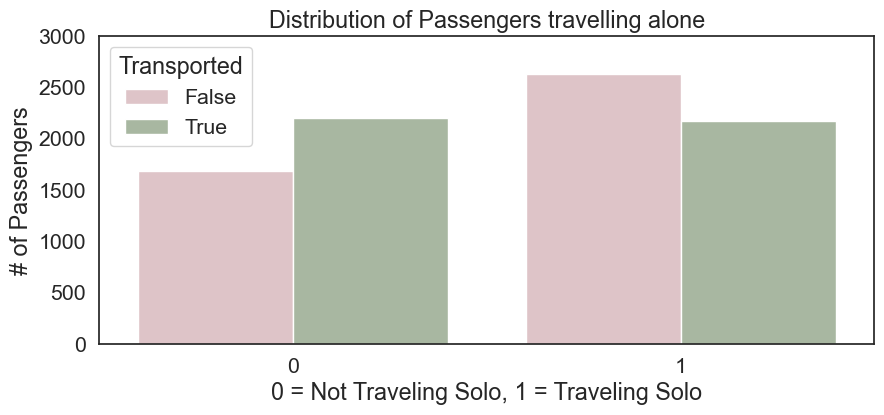

Source: Spaceship Titanic's Computer Records


In [18]:
# Create Graph 08 - Distribution of Passengers travelling alone 

# New feature distribution
plt.figure(figsize=(10, 4))
sns.countplot(data=titanic_train,
              x="Solo",
              hue="Transported",
              palette = ["#E2C0C5","#A6BB9D"])

plt.title("Distribution of Passengers travelling alone")

plt.xlabel("0 = Not Traveling Solo, 1 = Traveling Solo")   # fixed x-labels
plt.ylabel('# of Passengers')
plt.ylim([0, 3000])

# Print Graph 08 - Distribution of Passengers travelling alone
print("Graph 08 - Distribution of Passengers travelling alone")
plt.show()

print("Source: Spaceship Titanic's Computer Records")

### Cabin

In [19]:
# Calculate the distribution of Cabins

# Extract deck, number and side from cabin feature.

# Replace NaN's with outliers for now (so we can split feature)
titanic_train["Cabin"].fillna("deck/9999/side", inplace=True)
titanic_test["Cabin"].fillna("deck/9999/side", inplace=True)

# New features - training set
titanic_train["Cabin_deck"] = titanic_train["Cabin"].apply(lambda x: x.split("/")[0])
titanic_train["Cabin_number"] = (
    titanic_train["Cabin"].apply(lambda x: x.split("/")[1]).astype(int)
)
titanic_train["Cabin_side"] = titanic_train["Cabin"].apply(lambda x: x.split("/")[2])

# New features - test set
titanic_test["Cabin_deck"] = titanic_test["Cabin"].apply(lambda x: x.split("/")[0])
titanic_test["Cabin_number"] = (
    titanic_test["Cabin"].apply(lambda x: x.split("/")[1]).astype(int)
)
titanic_test["Cabin_side"] = titanic_test["Cabin"].apply(lambda x: x.split("/")[2])

# Put Nan's back in (we will fill these later)
titanic_train.loc[titanic_train["Cabin_deck"] == "deck", "Cabin_deck"] = np.nan
titanic_train.loc[titanic_train["Cabin_number"] == 9999, "Cabin_number"] = np.nan
titanic_train.loc[titanic_train["Cabin_side"] == "side", "Cabin_side"] = np.nan
titanic_test.loc[titanic_test["Cabin_deck"] == "deck", "Cabin_deck"] = np.nan
titanic_test.loc[titanic_test["Cabin_number"] == 9999, "Cabin_number"] = np.nan
titanic_test.loc[titanic_test["Cabin_side"] == "side", "Cabin_side"] = np.nan

# Drop Cabin (we don't need it anymore)
titanic_train.drop("Cabin", axis=1, inplace=True)
titanic_test.drop("Cabin", axis=1, inplace=True)

Graph 09  - Distribution of passengers by New Cabin features


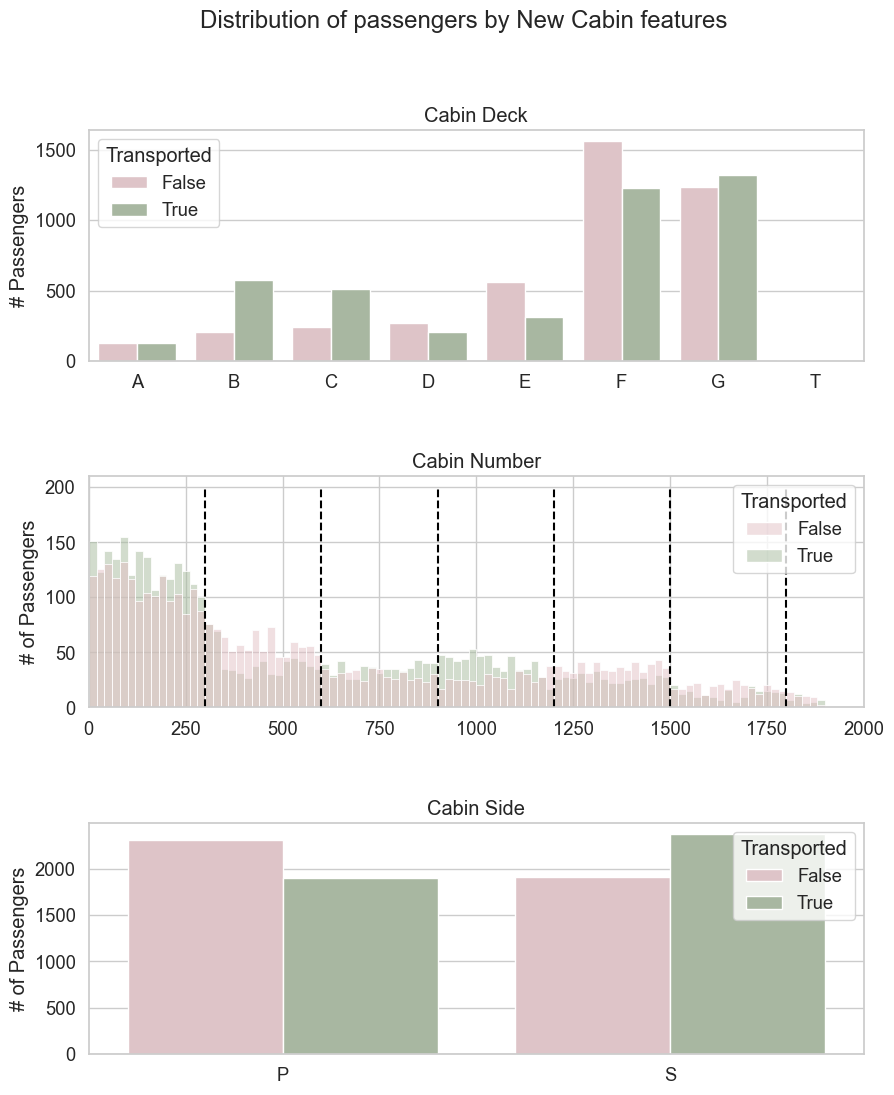

Source: Spaceship Titanic's Computer Records


In [20]:
# Print Graph 09 - Distribution of passengers by New Cabin features
print("Graph 09  - Distribution of passengers by New Cabin features")

# Plot distribution of new features
sns.set(font_scale=1.2, style="whitegrid")
sns.set_palette(["#FFB6C1", "#8FBC8F"])
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(10, 12))
sns.countplot(
    data=titanic_train,
    x="Cabin_deck",
    hue="Transported",
    order=["A", "B", "C", "D", "E", "F", "G", "T"],
    palette = ["#E2C0C5","#A6BB9D"],
    ax=ax[0],
)
ax[0].set_title("Cabin Deck")
ax[0].set_xlabel("")
ax[0].set_ylabel("# Passengers")

sns.histplot(
    data=titanic_train,
    x="Cabin_number",
    hue="Transported",
    binwidth=20,
    ax=ax[1],
    palette = ["#E2C0C5","#A6BB9D"],
)
ax[1].vlines(
    [300, 600, 900, 1200, 1500, 1800],
    ymin=0,
    ymax=200,
    color="black",
    linestyles="dashed",
)
ax[1].set_title("Cabin Number")
ax[1].set_xlim([0, 2000])
ax[1].set_xlabel("")
ax[1].set_ylabel("# of Passengers")


sns.countplot(
    data=titanic_train,
    x="Cabin_side",
    hue="Transported",
    palette = ["#E2C0C5","#A6BB9D"],
    ax=ax[2],
)
ax[2].set_title("Cabin Side")
ax[2].set_xlabel("")
ax[2].set_ylabel("# of Passengers")

fig.subplots_adjust(hspace=0.5)
fig.suptitle("Distribution of passengers by New Cabin features")

plt.show()
print("Source: Spaceship Titanic's Computer Records")

In [21]:
titanic_train.describe()

Age   RoomService     FoodCourt  ShoppingMall           Spa  \
count  8514.000000   8512.000000   8510.000000   8485.000000   8510.000000   
mean     28.827930    224.687617    458.077203    173.729169    311.138778   
std      14.489021    666.717663   1611.489240    604.696458   1136.705535   
min       0.000000      0.000000      0.000000      0.000000      0.000000   
25%      19.000000      0.000000      0.000000      0.000000      0.000000   
50%      27.000000      0.000000      0.000000      0.000000      0.000000   
75%      38.000000     47.000000     76.000000     27.000000     59.000000   
max      79.000000  14327.000000  29813.000000  23492.000000  22408.000000   

             VRDeck        Expend  No_spending        Group   Group_size  \
count   8505.000000   8693.000000  8693.000000  8693.000000  8693.000000   
mean     304.854791   1440.866329     0.420223  4633.389624     2.035546   
std     1145.717189   2803.045694     0.493623  2671.028856     1.596347   
min        0.000000      0.000000     0.000000     1.000000     1.000000   
25%        0.000000      0.000000     0.000000  2319.000000     1.000000   
50%        0.000000    716.000000     0.000000  4630.000000     1.000000   
75%       46.000000   1441.000000     1.000000  6883.000000     3.000000   
max    24133.000000  35987.000000     1.000000  9280.000000     8.000000   

              Solo  Cabin_number  
count  8693.000000   8494.000000  
mean      0.552744    600.367671  
std       0.497239    511.867226  
min       0.000000      0.000000  
25%       0.000000    167.250000  
50%       1.000000    427.000000  
75%       1.000000    999.000000  
max       1.000000   1894.000000

#### Explanation of new features from 'Cabin'


As we saw in the variable description:

"Cabin" is set as XX/YY/ZZ where XX = deck, YY = number and ZZ = side

Therefore, we are going to separate it as foloowing:

- 'Cabin_deck': Deck from the ship where the passenger is staying, Values: 'A','B','C','D','E','F','G','H','T'

- 'Cabin_number': Number of the cabin where the passenger is staying, Value Range: 0001 - 1894

- 'Cabin_side': Side of the ship in where the cabin is located, Values: 'P','S'.


In [22]:
# New features - training set
cabin_gap = round(titanic_train["Cabin_number"].max() / 7, 0)

titanic_train["CS1"] = (titanic_train["Cabin_number"] < cabin_gap).astype(int)
titanic_train["CS2"] = (
    (titanic_train["Cabin_number"] >= cabin_gap)
    & (titanic_train["Cabin_number"] < 2 * cabin_gap)
).astype(int)
titanic_train["CS3"] = (
    (titanic_train["Cabin_number"] >= 2 * cabin_gap)
    & (titanic_train["Cabin_number"] < 3 * cabin_gap)
).astype(int)
titanic_train["CS4"] = (
    (titanic_train["Cabin_number"] >= 3 * cabin_gap)
    & (titanic_train["Cabin_number"] < 4 * cabin_gap)
).astype(int)
titanic_train["CS5"] = (
    (titanic_train["Cabin_number"] >= 4 * cabin_gap)
    & (titanic_train["Cabin_number"] < 5 * cabin_gap)
).astype(int)
titanic_train["CS6"] = (
    (titanic_train["Cabin_number"] >= 5 * cabin_gap)
    & (titanic_train["Cabin_number"] < 6 * cabin_gap)
).astype(int)
titanic_train["CS7"] = (titanic_train["Cabin_number"] >= 6 * cabin_gap).astype(int)

# New features - test set

titanic_test["CS1"] = (titanic_test["Cabin_number"] < cabin_gap).astype(int)
titanic_test["CS2"] = (
    (titanic_test["Cabin_number"] >= cabin_gap)
    & (titanic_test["Cabin_number"] < 2 * cabin_gap)
).astype(int)
titanic_test["CS3"] = (
    (titanic_test["Cabin_number"] >= 2 * cabin_gap)
    & (titanic_test["Cabin_number"] < 3 * cabin_gap)
).astype(int)
titanic_test["CS4"] = (
    (titanic_test["Cabin_number"] >= 3 * cabin_gap)
    & (titanic_test["Cabin_number"] < 4 * cabin_gap)
).astype(int)
titanic_test["CS5"] = (
    (titanic_test["Cabin_number"] >= 4 * cabin_gap)
    & (titanic_test["Cabin_number"] < 5 * cabin_gap)
).astype(int)
titanic_test["CS6"] = (
    (titanic_test["Cabin_number"] >= 5 * cabin_gap)
    & (titanic_test["Cabin_number"] < 6 * cabin_gap)
).astype(int)
titanic_test["CS7"] = (titanic_test["Cabin_number"] >= 6 * cabin_gap).astype(int)

Graph 10 - Distribution of Passengers by Cabin Section (CS)


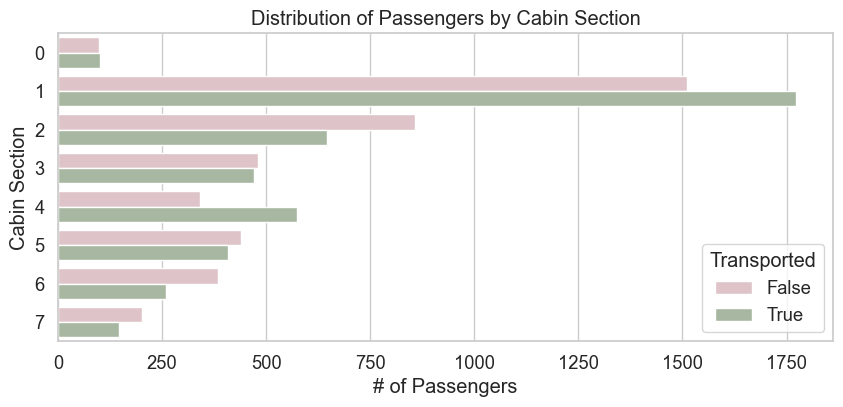

Source: Spaceship Titanic's Computer Records


In [23]:
# Print Graph 10 - Distribution of Passengers by Cabin Section (CS)

# Plot distribution of new features
plt.figure(figsize=(10, 4))
titanic_train["Cabin_sections_plot"] = (
    titanic_train["CS1"]
    + 2 * titanic_train["CS2"]
    + 3 * titanic_train["CS3"]
    + 4 * titanic_train["CS4"]
    + 5 * titanic_train["CS5"]
    + 6 * titanic_train["CS6"]
    + 7 * titanic_train["CS7"]
).astype(int)

sns.countplot(data=titanic_train,
              y="Cabin_sections_plot",
              hue="Transported",
              palette = ["#E2C0C5","#A6BB9D"])

plt.xlabel("# of Passengers")   # fixed x-labels
plt.ylabel('Cabin Section')
plt.title("Distribution of Passengers by Cabin Section")
titanic_train.drop("Cabin_sections_plot", axis=1, inplace=True)

print("Graph 10 - Distribution of Passengers by Cabin Section (CS)")
plt.show()

print("Source: Spaceship Titanic's Computer Records")

[MISSING EXPLANATION]

### Last name

#### Explanation

'Last Name'   - We found that there was one last name that was extremly common, 
                generating a family size of 294. It is assumed that it is not
                related to family size.

'Family_size' - Count of passengers with the same 'Last Name'.            
          

In [24]:
#Calculate family size from last name.

# Replace NaN's with outliers for now (so we can split feature)
titanic_train['Name'].fillna('Unknown Unknown', inplace=True)
titanic_test['Name'].fillna('Unknown Unknown', inplace=True)

# New feature - Lastname
titanic_train['Lastname']=titanic_train['Name'].str.split().str[-1]
titanic_test['Lastname']=titanic_test['Name'].str.split().str[-1]

# New feature - Family size
titanic_train['Family_size']=titanic_train['Lastname'].map(lambda x: pd.concat([titanic_train['Lastname'],titanic_test['Lastname']]).value_counts()[x])
titanic_test['Family_size']=titanic_test['Lastname'].map(lambda x: pd.concat([titanic_train['Lastname'],titanic_test['Lastname']]).value_counts()[x])


Graph 11 - Distribution of Passengers by Family Size


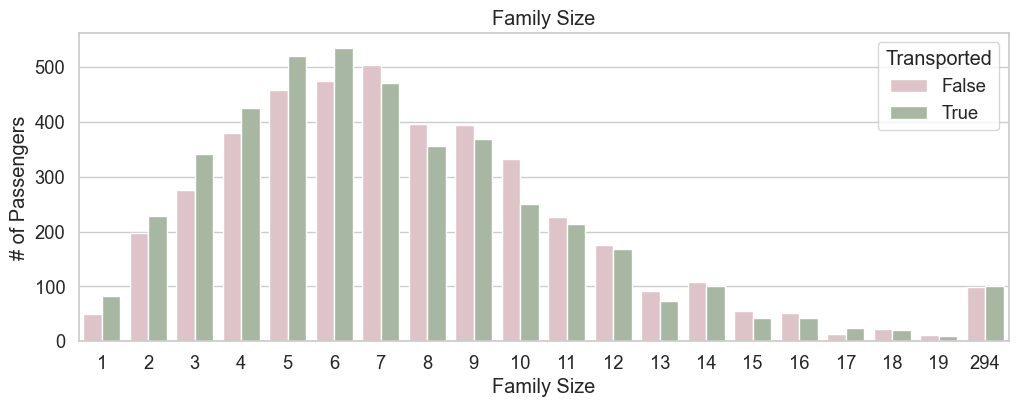

Source: Spaceship Titanic's Computer Records


In [25]:
# Print Graph 11 - Distribution of Passengers by Family Size
print("Graph 11 - Distribution of Passengers by Family Size")

# New feature distribution
plt.figure(figsize=(12,4))
sns.countplot(data=titanic_train, 
              x='Family_size',
              hue='Transported',
             palette = ["#E2C0C5","#A6BB9D"])

plt.title('Family Size')
plt.xlabel("Family Size")   # fixed x-labels
plt.ylabel('# of Passengers')

plt.show()
print("Source: Spaceship Titanic's Computer Records")

In [26]:
# Put Nan's back in (we will fill these later)
titanic_train.loc[titanic_train['Lastname']=='Unknown','Lastname']=np.nan
titanic_train.loc[titanic_train['Family_size']>293,'Family_size']=np.nan
titanic_test.loc[titanic_test['Lastname']=='Unknown','Lastname']=np.nan
titanic_test.loc[titanic_test['Family_size']>293,'Family_size']=np.nan

# Drop name (we don't need it anymore)
titanic_train.drop('Name', axis=1, inplace=True)
titanic_test.drop('Name', axis=1, inplace=True)


# Solving Sub Problem  1

## Transformations: Missing Values

In [27]:
#This will make it easier to fill missing values. We will split it back later.

# Labels and features
y=titanic_train['Transported'].copy().astype(int)
X=titanic_train.drop('Transported', axis=1).copy()

# Concatenate dataframes
titanic_df = pd.concat([X, titanic_test], axis=0).reset_index(drop=True)
titanic_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12970 entries, 0 to 12969
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   12970 non-null  object 
 1   HomePlanet    12682 non-null  object 
 2   CryoSleep     12660 non-null  object 
 3   Destination   12696 non-null  object 
 4   Age           12700 non-null  float64
 5   VIP           12674 non-null  object 
 6   RoomService   12707 non-null  float64
 7   FoodCourt     12681 non-null  float64
 8   ShoppingMall  12664 non-null  float64
 9   Spa           12686 non-null  float64
 10  VRDeck        12702 non-null  float64
 11  Expend        12970 non-null  float64
 12  Age Group     11775 non-null  object 
 13  No_spending   12970 non-null  int32  
 14  Group         12970 non-null  int32  
 15  Group_size    12970 non-null  int64  
 16  Solo          12970 non-null  int32  
 17  Cabin_deck    12671 non-null  object 
 18  Cabin_number  12671 non-nu

In [28]:
# Columns with missing values
na_cols=titanic_df.columns[titanic_df.isna().any()].tolist()

# Missing values summary
mv=pd.DataFrame(titanic_df[na_cols].isna().sum(), columns=['Number_missing'])
mv['Percentage_missing']=np.round(100*mv['Number_missing']/len(titanic_df),2)
mv

Number_missing  Percentage_missing
HomePlanet               288                2.22
CryoSleep                310                2.39
Destination              274                2.11
Age                      270                2.08
VIP                      296                2.28
RoomService              263                2.03
FoodCourt                289                2.23
ShoppingMall             306                2.36
Spa                      284                2.19
VRDeck                   268                2.07
Age Group               1195                9.21
Cabin_deck               299                2.31
Cabin_number             299                2.31
Cabin_side               299                2.31
Lastname                 294                2.27
Family_size              294                2.27

#### Explanation: 

Count of NA per feature.

### HomePlanet and Group

In [29]:
# Joint distribution of Group and HomePlanet
Group_HomePlanet_gb = (
    titanic_df.groupby(["Group", "HomePlanet"])["HomePlanet"].size().unstack().fillna(0)
)

# Passengers with missing HomePlanet and in a group with known HomePlanet
Group_HomePlanet_index = titanic_df[titanic_df["HomePlanet"].isna()][
    (titanic_df[titanic_df["HomePlanet"].isna()]["Group"]).isin(Group_HomePlanet_gb.index)
].index

# Fill corresponding missing values
titanic_df.loc[Group_HomePlanet_index, "HomePlanet"] = titanic_df.iloc[Group_HomePlanet_index, :]["Group"].map(
    lambda x: Group_HomePlanet_gb.idxmax(axis=1)[x]
)

#### Explanation:

We assume that for missing values, the people that are in the same group, they come from the same 'HomePlanet'.

In [30]:
# Print number of Remaining NaN left in 'HomePlanet'
print("Remaining NaN after:", titanic_df["HomePlanet"].isna().sum())

Remaining NaN after: 157


### HomePlanet and CabinDeck

<AxesSubplot:xlabel='Cabin_deck', ylabel='HomePlanet'>

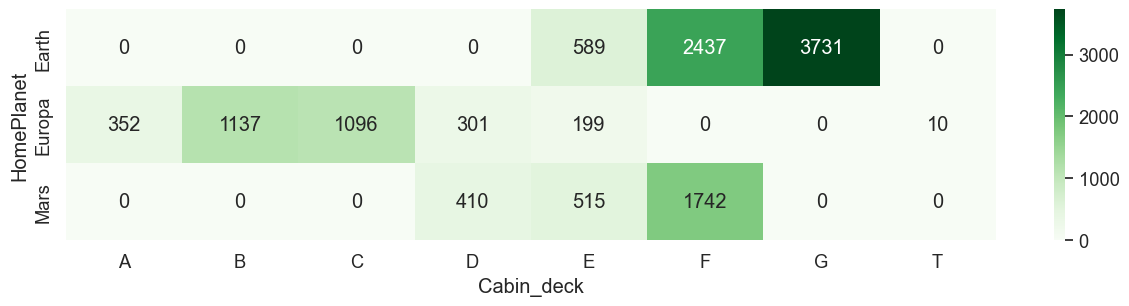

In [31]:
# Joint distribution of CabinDeck and HomePlanet
CabinDeck_HomePlanet_gb=titanic_df.groupby(['Cabin_deck','HomePlanet'])['HomePlanet'].size().unstack().fillna(0)

# Heatmap
plt.figure(figsize=(15,3))
sns.heatmap(CabinDeck_HomePlanet_gb.T,
            annot=True,
            fmt='g',
            cmap = 'Greens')

In [32]:
# Decks A, B, C or T came from Europa
titanic_df.loc[(titanic_df['HomePlanet'].isna()) & (titanic_df['Cabin_deck'].isin(['A', 'B', 'C', 'T'])), 'HomePlanet']='Europa'

# Deck G came from Earth
titanic_df.loc[(titanic_df['HomePlanet'].isna()) & (titanic_df['Cabin_deck']=='G'), 'HomePlanet']='Earth'

### Explanation:

According to the given information, individuals who were situated on the A, B, C, or T decks originated from Europa. Individuals on the G deck came from Earth. Those who were positioned on the D, E, or F decks originated from multiple planets.

In [33]:
# Print number of Remaining NaN left in 'HomePlanet'
print("Remaining NaN after:", titanic_df["HomePlanet"].isna().sum())

Remaining NaN after: 94


### HomePlanet and Surname

In [34]:
# Joint distribution of Lastname and HomePlanet
Lastname_HomePlanet_gb=titanic_df.groupby(['Lastname','HomePlanet'])['HomePlanet'].size().unstack().fillna(0)

# Passengers with missing HomePlanet and in a family with known HomePlanet
Lastname_HomePlanet_index=titanic_df[titanic_df['HomePlanet'].isna()][(titanic_df[titanic_df['HomePlanet'].isna()]['Lastname']).isin(Lastname_HomePlanet_gb.index)].index

# Fill corresponding missing values
titanic_df.loc[Lastname_HomePlanet_index,'HomePlanet']=titanic_df.iloc[Lastname_HomePlanet_index,:]['Lastname'].map(lambda x: Lastname_HomePlanet_gb.idxmax(axis=1)[x])

# Print number of Remaining NaN left in 'HomePlanet'
print("Remaining NaN after:",titanic_df['HomePlanet'].isna().sum())

Remaining NaN after: 10


In [35]:
# Missing values 
titanic_df[titanic_df['HomePlanet'].isna()][['PassengerId','HomePlanet','Destination']]

PassengerId HomePlanet  Destination
2274      2443_01        NaN  TRAPPIST-1e
2631      2817_01        NaN  TRAPPIST-1e
3091      3331_01        NaN  TRAPPIST-1e
4548      4840_01        NaN  TRAPPIST-1e
5762      6108_01        NaN  TRAPPIST-1e
8969      0616_01        NaN  TRAPPIST-1e
10583     4052_01        NaN  TRAPPIST-1e
11913     7065_01        NaN  TRAPPIST-1e
12551     8435_01        NaN  TRAPPIST-1e
12725     8775_01        NaN  TRAPPIST-1e

All of the remaining NaN in HomePlanet are heading to TRAPPIST-1e

### HomePlanet and Destination

<AxesSubplot:xlabel='HomePlanet', ylabel='Destination'>

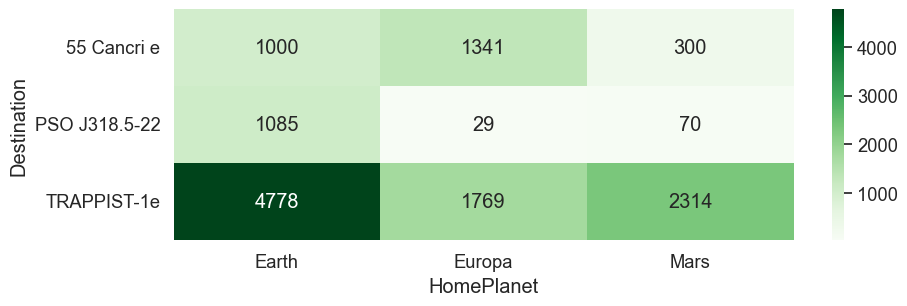

In [36]:
# Joint distribution of HomePlanet and Destination

Destination_HomePlanet_gb = titanic_df.groupby(['HomePlanet','Destination'])['Destination'].size().unstack().fillna(0)

# Heatmap of missing values
plt.figure(figsize=(10,3))
sns.heatmap(Destination_HomePlanet_gb.T, 
            annot=True, 
            fmt='g', 
            cmap='Greens')

### Explanation

People coming from Earth are mostly going to TRAPPIST-1e. it can be assumed that the remaining NaN are coming from Earth too. Howvwe
But first we need to filter the passengers from Deck D, because we know that there's no one coming from Earth.

In [37]:
# Fill remaining HomePlanet missing values with Earth (if not on deck D) or Mars (if on Deck D)
titanic_df.loc[(titanic_df['HomePlanet'].isna()) & ~(titanic_df['Cabin_deck']=='D'), 'HomePlanet']='Earth'
titanic_df.loc[(titanic_df['HomePlanet'].isna()) & (titanic_df['Cabin_deck']=='D'), 'HomePlanet']='Mars'

# Print number of Remaining NaN left in 'HomePlanet'
print("Remaining NaN after:",titanic_df['HomePlanet'].isna().sum())

Remaining NaN after: 0


Destination

In [38]:
#TRAPPIST is the most common destination, so we will use is to fill nans in this section

# Fill missing Destination values with mode
titanic_df.loc[(titanic_df['Destination'].isna()), 'Destination']='TRAPPIST-1e'

# Print number of Remaining NaN left in 'HomePlanet'
print("Remaining NaN after:",titanic_df['Destination'].isna().sum())

Remaining NaN after: 0


### Lastname and group

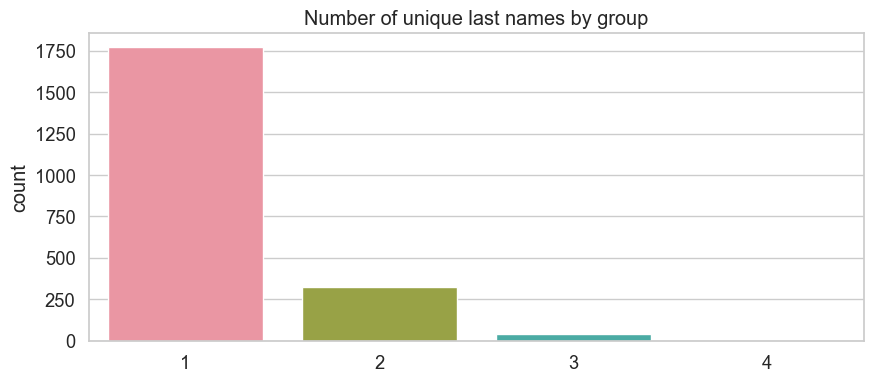

In [39]:
# Joint distribution of Group and Surname
Group_Lastname_gb=titanic_df[titanic_df['Group_size']>1].groupby(['Group','Lastname'])['Lastname'].size().unstack().fillna(0)

# Countplot of unique values
plt.figure(figsize=(10,4))
sns.countplot((Group_Lastname_gb>0).sum(axis=1))
plt.title('Number of unique last names by group')
plt.show()

In [40]:
# Passengers with missing Lastname and in a group with known majority Lastname
Group_Lastname_index=titanic_df[titanic_df['Lastname'].isna()][(titanic_df[titanic_df['Lastname'].isna()]['Group']).isin(Group_Lastname_gb.index)].index

# Fill corresponding missing values
titanic_df.loc[Group_Lastname_index,'Lastname']=titanic_df.iloc[Group_Lastname_index,:]['Group'].map(lambda x: Group_Lastname_gb.idxmax(axis=1)[x])

# Print number of Remaining NaN left in 'Lastname'
print("Remaining NaN after:",titanic_df['Lastname'].isna().sum())

Remaining NaN after: 155


In [41]:
# Replace NaN's with outliers (so we can use map)
titanic_df['Lastname'].fillna('Unknown', inplace=True)

# Update family size feature
titanic_df['Family_size']=titanic_df['Lastname'].map(lambda x: titanic_df['Lastname'].value_counts()[x])

# Put NaN's back in place of outliers
titanic_df.loc[titanic_df['Lastname']=='Unknown','Lastname']=np.nan

# Say unknown surname means no family
titanic_df.loc[titanic_df['Family_size']>100,'Family_size']=0

### CabinSide and Group CHANGE DE CHART

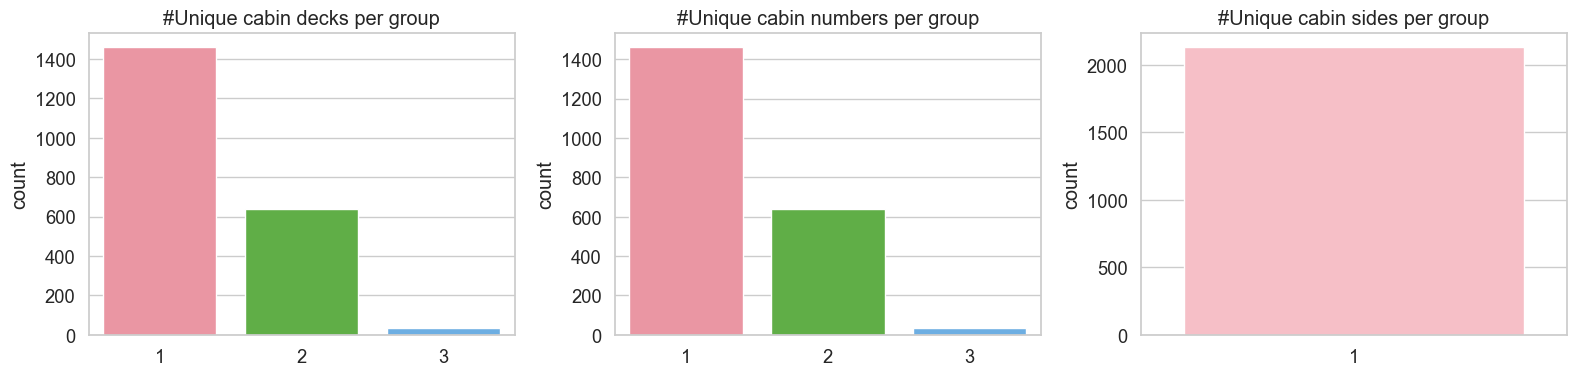

In [42]:
# Joint distribution of Group and Cabin features
Group_Cabin_deck_gb=titanic_df[titanic_df['Group_size']>1].groupby(['Group','Cabin_deck'])['Cabin_deck'].size().unstack().fillna(0)
Group_Cabin_number_gb=titanic_df[titanic_df['Group_size']>1].groupby(['Group','Cabin_number'])['Cabin_number'].size().unstack().fillna(0)
Group_Cabin_side_gb=titanic_df[titanic_df['Group_size']>1].groupby(['Group','Cabin_side'])['Cabin_side'].size().unstack().fillna(0)

# Countplots
fig=plt.figure(figsize=(16,4))
plt.subplot(1,3,1)
sns.countplot((Group_Cabin_deck_gb>0).sum(axis=1))
plt.title('#Unique cabin decks per group')

plt.subplot(1,3,2)
sns.countplot((Group_Cabin_number_gb>0).sum(axis=1))
plt.title('#Unique cabin numbers per group')

plt.subplot(1,3,3)
sns.countplot((Group_Cabin_side_gb>0).sum(axis=1))
plt.title('#Unique cabin sides per group')
fig.tight_layout()

In [43]:
# Passengers with missing Cabin side and in a group with known Cabin side
Group_Cabin_side_index=titanic_df[titanic_df['Cabin_side'].isna()][(titanic_df[titanic_df['Cabin_side'].isna()]['Group']).isin(Group_Cabin_side_gb.index)].index

# Fill corresponding missing values
titanic_df.loc[Group_Cabin_side_index,'Cabin_side']=titanic_df.iloc[Group_Cabin_side_index,:]['Group'].map(lambda x: Group_Cabin_side_gb.idxmax(axis=1)[x])

# Print number of Remaining NaN left
print("Remaining NaN after:",titanic_df['Cabin_side'].isna().sum())

Remaining NaN after: 162


### CabinSide and Lastname

In [44]:
# Joint distribution of Surname and Cabin side
Lastname_Cabin_side_gb = titanic_df[titanic_df['Group_size']>1].groupby(['Lastname','Cabin_side'])['Cabin_side'].size().unstack().fillna(0)
# Ratio of sides
Lastname_Cabin_side_gb['Ratio']=Lastname_Cabin_side_gb['P']/(Lastname_Cabin_side_gb['P']+Lastname_Cabin_side_gb['S'])

Lastname_Cabin_side_gb['Ratio']

# Print proportion
print('Percentage of families all on the same cabin side:', 100*np.round((Lastname_Cabin_side_gb['Ratio'].isin([0,1])).sum()/len(Lastname_Cabin_side_gb),3),'%')

Percentage of families all on the same cabin side: 76.7 %


In [45]:
# Drop ratio column
Lastname_Cabin_side_gb.drop('Ratio', axis=1, inplace=True)

# Passengers with missing Cabin side and in a family with known Cabin side
Lastname_Cabin_side_index=titanic_df[titanic_df['Cabin_side'].isna()][(titanic_df[titanic_df['Cabin_side'].isna()]['Lastname']).isin(Lastname_Cabin_side_gb.index)].index

# Fill corresponding missing values
titanic_df.loc[Lastname_Cabin_side_index,'Cabin_side']=titanic_df.iloc[Lastname_Cabin_side_index,:]['Lastname'].map(lambda x: Lastname_Cabin_side_gb.idxmax(axis=1)[x])

# Drop surname (we don't need it anymore)
titanic_df.drop('Lastname', axis=1, inplace=True)

# Print number of Remaining NaN left
print("Remaining NaN after:",titanic_df['Cabin_side'].isna().sum())

Remaining NaN after: 66


In [46]:
titanic_df['Cabin_side'].value_counts()

S    6504
P    6400
Name: Cabin_side, dtype: int64

In [47]:
# Fill remaining missing values with outlier
titanic_df.loc[titanic_df['Cabin_side'].isna(),'Cabin_side']='P'

# Print number of Remaining NaN left
print("Remaining NaN after:",titanic_df['Cabin_side'].isna().sum())

Remaining NaN after: 0


### CabinDeck and Group

In [48]:
# Passengers with missing Cabin deck and in a group with known majority Cabin deck
Group_Cabin_deck_index=titanic_df[titanic_df['Cabin_deck'].isna()][(titanic_df[titanic_df['Cabin_deck'].isna()]['Group']).isin(Group_Cabin_deck_gb.index)].index

# Fill corresponding missing values
titanic_df.loc[Group_Cabin_deck_index,'Cabin_deck']=titanic_df.iloc[Group_Cabin_deck_index,:]['Group'].map(lambda x: Group_Cabin_deck_gb.idxmax(axis=1)[x])

# Print number of Remaining NaN left
print("Remaining NaN after:",titanic_df['Cabin_deck'].isna().sum())

Remaining NaN after: 162


### CabinDeck and HomePlanet

In [49]:
# Joint distribution
titanic_df.groupby(['HomePlanet','Destination','Solo','Cabin_deck'])['Cabin_deck'].size().unstack().fillna(0)

Cabin_deck                         A      B      C      D      E       F  \
HomePlanet Destination   Solo                                              
Earth      55 Cancri e   0       0.0    0.0    0.0    0.0   20.0    90.0   
                         1       0.0    0.0    0.0    0.0   47.0   289.0   
           PSO J318.5-22 0       0.0    0.0    0.0    0.0   18.0    67.0   
                         1       0.0    0.0    0.0    0.0   25.0   262.0   
           TRAPPIST-1e   0       0.0    0.0    0.0    0.0  133.0   438.0   
                         1       0.0    0.0    0.0    0.0  358.0  1350.0   
Europa     55 Cancri e   0      96.0  377.0  313.0   59.0   35.0     0.0   
                         1      67.0  141.0  159.0   46.0   34.0     0.0   
           PSO J318.5-22 0       2.0    5.0   11.0    0.0    0.0     0.0   
                         1       0.0    0.0   10.0    0.0    0.0     0.0   
           TRAPPIST-1e   0     152.0  459.0  428.0  120.0   53.0     0.0   
                         1      44.0  179.0  201.0   84.0   82.0     0.0   
Mars       55 Cancri e   0       0.0    0.0    0.0   32.0   15.0   104.0   
                         1       0.0    0.0    0.0   40.0   16.0    92.0   
           PSO J318.5-22 0       0.0    0.0    0.0    8.0    9.0    14.0   
                         1       0.0    0.0    0.0    9.0    7.0    21.0   
           TRAPPIST-1e   0       0.0    0.0    0.0  168.0  219.0   798.0   
                         1       0.0    0.0    0.0  164.0  263.0   743.0   

Cabin_deck                          G    T  
HomePlanet Destination   Solo               
Earth      55 Cancri e   0      272.0  0.0  
                         1      269.0  0.0  
           PSO J318.5-22 0      230.0  0.0  
                         1      466.0  0.0  
           TRAPPIST-1e   0     1075.0  0.0  
                         1     1509.0  0.0  
Europa     55 Cancri e   0        0.0  2.0  
                         1        0.0  0.0  
           PSO J318.5-22 0        0.0  0.0  
                         1        0.0  0.0  
           TRAPPIST-1e   0        0.0  1.0  
                         1        0.0  8.0  
Mars       55 Cancri e   0        0.0  0.0  
                         1        0.0  0.0  
           PSO J318.5-22 0        0.0  0.0  
                         1        0.0  0.0  
           TRAPPIST-1e   0        0.0  0.0  
                         1        0.0  0.0

In [50]:
# Fill missing values using the mode
nan_Cabin_deck=titanic_df.loc[titanic_df['Cabin_deck'].isna(),'Cabin_deck'].index
titanic_df.loc[titanic_df['Cabin_deck'].isna(),'Cabin_deck']=titanic_df.groupby(['HomePlanet','Destination','Solo'])['Cabin_deck'].transform(lambda x: x.fillna(pd.Series.mode(x)[0]))[nan_Cabin_deck]

# Print number of Remaining NaN left
print("Remaining NaN after:",titanic_df['Cabin_deck'].isna().sum())

Remaining NaN after: 0


In [51]:
# One-hot encode cabin regions (keeping the gap calculated using the train table)
cabin_gap = round(titanic_train["Cabin_number"].max() / 7, 0)

titanic_df["CS1"] = (titanic_df["Cabin_number"] < cabin_gap).astype(int)
titanic_df["CS2"] = (
    (titanic_df["Cabin_number"] >= cabin_gap)
    & (titanic_df["Cabin_number"] < 2 * cabin_gap)
).astype(int)
titanic_df["CS3"] = (
    (titanic_df["Cabin_number"] >= 2 * cabin_gap)
    & (titanic_df["Cabin_number"] < 3 * cabin_gap)
).astype(int)
titanic_df["CS4"] = (
    (titanic_df["Cabin_number"] >= 3 * cabin_gap)
    & (titanic_df["Cabin_number"] < 4 * cabin_gap)
).astype(int)
titanic_df["CS5"] = (
    (titanic_df["Cabin_number"] >= 4 * cabin_gap)
    & (titanic_df["Cabin_number"] < 5 * cabin_gap)
).astype(int)
titanic_df["CS6"] = (
    (titanic_df["Cabin_number"] >= 5 * cabin_gap)
    & (titanic_df["Cabin_number"] < 6 * cabin_gap)
).astype(int)
titanic_df["CS7"] = (titanic_df["Cabin_number"] >= 6 * cabin_gap).astype(int)

### VIP

In [52]:
titanic_df['VIP'].value_counts()

False    12401
True       273
Name: VIP, dtype: int64

In [53]:
# Fill missing values with mode
titanic_df.loc[titanic_df['VIP'].isna(),'VIP']=False

# Print number of Remaining NaN left
print("Remaining NaN after:",titanic_df['VIP'].isna().sum())

Remaining NaN after: 0


### Age

In [54]:
# Joint distribution
titanic_df.groupby(['HomePlanet','No_spending','Solo','Cabin_deck'])['Age'].median().unstack().fillna(0)

Cabin_deck                      A     B     C     D     E     F     G     T
HomePlanet No_spending Solo                                                
Earth      0           0      0.0   0.0   0.0   0.0  24.0  25.0  28.0   0.0
                       1      0.0   0.0   0.0   0.0  25.0  24.0  26.0   0.0
           1           0      0.0   0.0   0.0   0.0   7.0  16.0   8.0   0.0
                       1      0.0   0.0   0.0   0.0  21.0  21.5  23.0   0.0
Europa     0           0     35.0  34.0  33.0  33.0  34.0   0.0   0.0  44.0
                       1     35.0  36.0  35.5  34.0  35.0   0.0   0.0  35.0
           1           0     30.0  27.0  28.5  27.0  28.0   0.0   0.0   0.0
                       1     37.5  34.0  35.0  31.0  33.0   0.0   0.0   0.0
Mars       0           0      0.0   0.0   0.0  30.0  29.0  29.0   0.0   0.0
                       1      0.0   0.0   0.0  31.0  28.5  30.0   0.0   0.0
           1           0      0.0   0.0   0.0  29.5  26.0  18.0   0.0   0.0
                       1      0.0   0.0   0.0  33.0  30.0  29.5   0.0   0.0

In [55]:
# Fill missing values using the median
nan_Age = titanic_df.loc[titanic_df['Age'].isna(),'Age'].index
titanic_df.loc[titanic_df['Age'].isna(),'Age']=titanic_df.groupby(['HomePlanet','No_spending','Solo','Cabin_deck'])['Age'].transform(lambda x: x.fillna(x.median()))[nan_Age]

# Print number of Remaining NaN left
print("Remaining NaN after:",titanic_df['Age'].isna().sum())

Remaining NaN after: 0


In [56]:
# Update age group feature
titanic_df['Age Group']=np.nan
titanic_df.loc[titanic_df['Age']<=12,'Age Group']='Kids'
titanic_df.loc[(titanic_df['Age']>12) & (titanic_df['Age']<18),'Age Group']='Teens'
titanic_df.loc[(titanic_df['Age']>=18) & (titanic_df['Age']<=40),'Age Group']='Adults'
titanic_df.loc[titanic_df['Age']>40,'Age Group']='Seniors'

### CryoSleep

In [57]:
# Joint distribution
titanic_df.groupby(['No_spending','CryoSleep'])['CryoSleep'].size().unstack().fillna(0)

CryoSleep     False    True
No_spending                
0            7339.0     0.0
1             740.0  4581.0

In [58]:
# Fill missing values using the mode
nan_Cryosleep = titanic_df.loc[titanic_df['CryoSleep'].isna(),'CryoSleep'].index
titanic_df.loc[titanic_df['CryoSleep'].isna(),'CryoSleep']=titanic_df.groupby(['No_spending'])['CryoSleep'].transform(lambda x: x.fillna(pd.Series.mode(x)[0]))[nan_Cryosleep]

# Print number of Remaining NaN left
print("Remaining NaN after:",titanic_df['CryoSleep'].isna().sum())

Remaining NaN after: 0


### CryoSleep and Expenditure

In [59]:
# CryoSleep has no expenditure
for ex in Expend:
    titanic_df.loc[(titanic_df[ex].isna()) & (titanic_df['CryoSleep']==True), ex]=0

# Print number of Remaining NaN left
print("Remaining NaN after:",titanic_df[Expend].isna().sum().sum())

Remaining NaN after: 866


### Expenditure and others

In [60]:
# Joint distribution
titanic_df.groupby(['HomePlanet','Solo','Age Group'])['Expend'].mean().unstack().fillna(0)

Age Group             Adults  Kids      Seniors        Teens
HomePlanet Solo                                             
Earth      0      782.277937   0.0   743.175824   724.902222
           1      782.443760   0.0   821.030941   693.014898
Europa     0     3536.269375   0.0  3588.569149  1153.160256
           1     3678.073103   0.0  3894.161383     0.000000
Mars       0     1190.304627   0.0  1189.298450  1176.839286
           1     1095.464789   0.0  1107.971061  1687.261538

In [61]:
# Fill remaining missing values using the median
for ex in Expend:
    nan_rows=titanic_df.loc[titanic_df[ex].isna(),ex].index
    titanic_df.loc[titanic_df[ex].isna(),ex]=titanic_df.groupby(['HomePlanet','Solo','Age Group'])[ex].transform(lambda x: x.fillna(x.mean()))[nan_rows]
    
# Print number of Remaining NaN left
print("Remaining NaN after:",titanic_df[Expend].isna().sum().sum())

Remaining NaN after: 0


In [62]:
# Update expenditure and no_spending
titanic_df['Expend']=titanic_df[Expend].sum(axis=1)
titanic_df['No_spending']=(titanic_df['Expend']==0).astype(int)

In [63]:
# Fill missing values using the mode
nan_Cabin_number=titanic_df.loc[titanic_df['Cabin_number'].isna(),'Cabin_number'].index
titanic_df.loc[titanic_df['Cabin_number'].isna(),'Cabin_number']=titanic_df.groupby(['HomePlanet','Destination','Solo'])['Cabin_number'].transform(lambda x: x.fillna(pd.Series.mode(x)[0]))[nan_Cabin_number]

# Print number of Remaining NaN left
print("Remaining NaN after:",titanic_df['Cabin_number'].isna().sum())

Remaining NaN after: 0


In [64]:
# One-hot encode cabin regions (keeping the gap calculated using the train table)
cabin_gap = round(titanic_train["Cabin_number"].max() / 7, 0)

titanic_df["CS1"] = (titanic_df["Cabin_number"] < cabin_gap).astype(int)
titanic_df["CS2"] = (
    (titanic_df["Cabin_number"] >= cabin_gap)
    & (titanic_df["Cabin_number"] < 2 * cabin_gap)
).astype(int)
titanic_df["CS3"] = (
    (titanic_df["Cabin_number"] >= 2 * cabin_gap)
    & (titanic_df["Cabin_number"] < 3 * cabin_gap)
).astype(int)
titanic_df["CS4"] = (
    (titanic_df["Cabin_number"] >= 3 * cabin_gap)
    & (titanic_df["Cabin_number"] < 4 * cabin_gap)
).astype(int)
titanic_df["CS5"] = (
    (titanic_df["Cabin_number"] >= 4 * cabin_gap)
    & (titanic_df["Cabin_number"] < 5 * cabin_gap)
).astype(int)
titanic_df["CS6"] = (
    (titanic_df["Cabin_number"] >= 5 * cabin_gap)
    & (titanic_df["Cabin_number"] < 6 * cabin_gap)
).astype(int)
titanic_df["CS7"] = (titanic_df["Cabin_number"] >= 6 * cabin_gap).astype(int)

In [65]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12970 entries, 0 to 12969
Data columns (total 28 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   12970 non-null  object 
 1   HomePlanet    12970 non-null  object 
 2   CryoSleep     12970 non-null  object 
 3   Destination   12970 non-null  object 
 4   Age           12970 non-null  float64
 5   VIP           12970 non-null  object 
 6   RoomService   12970 non-null  float64
 7   FoodCourt     12970 non-null  float64
 8   ShoppingMall  12970 non-null  float64
 9   Spa           12970 non-null  float64
 10  VRDeck        12970 non-null  float64
 11  Expend        12970 non-null  float64
 12  Age Group     12970 non-null  object 
 13  No_spending   12970 non-null  int32  
 14  Group         12970 non-null  int32  
 15  Group_size    12970 non-null  int64  
 16  Solo          12970 non-null  int32  
 17  Cabin_deck    12970 non-null  object 
 18  Cabin_number  12970 non-nu

In [66]:
titanic_df.isna().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Expend          0
Age Group       0
No_spending     0
Group           0
Group_size      0
Solo            0
Cabin_deck      0
Cabin_number    0
Cabin_side      0
CS1             0
CS2             0
CS3             0
CS4             0
CS5             0
CS6             0
CS7             0
Family_size     0
dtype: int64

<b> Sub Problem 1 Solution </b>

The data sets does not longer contain NaN.

## Sub problem 2: Finding the right Model

### Pre Processing

In [67]:
# y = titanic_df.iloc[:,:][titanic_df['set'] == 'Training']
titanic_df.head()

PassengerId HomePlanet CryoSleep  Destination   Age    VIP  RoomService  \
0     0001_01     Europa     False  TRAPPIST-1e  39.0  False          0.0   
1     0002_01      Earth     False  TRAPPIST-1e  24.0  False        109.0   
2     0003_01     Europa     False  TRAPPIST-1e  58.0   True         43.0   
3     0003_02     Europa     False  TRAPPIST-1e  33.0  False          0.0   
4     0004_01      Earth     False  TRAPPIST-1e  16.0  False        303.0   

   FoodCourt  ShoppingMall     Spa  ...  Cabin_number  Cabin_side CS1  CS2  \
0        0.0           0.0     0.0  ...           0.0           P   1    0   
1        9.0          25.0   549.0  ...           0.0           S   1    0   
2     3576.0           0.0  6715.0  ...           0.0           S   1    0   
3     1283.0         371.0  3329.0  ...           0.0           S   1    0   
4       70.0         151.0   565.0  ...           1.0           S   1    0   

   CS3  CS4  CS5 CS6  CS7 Family_size  
0    0    0    0   0    0           4  
1    0    0    0   0    0           4  
2    0    0    0   0    0           7  
3    0    0    0   0    0           7  
4    0    0    0   0    0           9  

[5 rows x 28 columns]

In [68]:
# Train and test
X=titanic_df[titanic_df['PassengerId'].isin(titanic_train['PassengerId'].values)].copy()
X_test=titanic_df[titanic_df['PassengerId'].isin(titanic_test['PassengerId'].values)].copy()

In [69]:
# Drop qualitative/redundant/collinear/high cardinality features
X.drop(['PassengerId', 'Group', 'Group_size', 'Age Group', 'Cabin_number'], axis=1, inplace=True)
X_test.drop(['PassengerId', 'Group', 'Group_size', 'Age Group', 'Cabin_number'], axis=1, inplace=True)

In [70]:
# Apply log transform for Test 
for col in ['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','Expend']:
    X[col]=np.log(1+X[col])
    X_test[col]=np.log(1+X_test[col])

In [71]:
# Convert categorical columns to numerical data using one-hot encoding
# Identify columns with categoric
categorical_cols = (X.dtypes == 'object')
object_cols = list(categorical_cols[categorical_cols].index)

# Apply one-hot encoding to each categorical column
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols = pd.DataFrame(OH_encoder.fit_transform(X[object_cols]))

# Restore the index of the one-hot encoded data
OH_cols.index = X.index

# Remove the original categorical columns from the dataset
OH_cols.set_axis(np.concatenate(OH_encoder.categories_), axis=1, inplace=True)

# Combine the numerical and one-hot encoded data
num_X = X.drop(object_cols, axis=1)

# Combing the Encoded columns to make it into one datasets
X = pd.concat([num_X, OH_cols], axis=1)

In [72]:
# Convert categorical columns to numerical data using one-hot encoding
# Identify columns with categorical data
categorical_cols2 = (X_test.dtypes == 'object')
object_cols2 = list(categorical_cols2[categorical_cols2].index)

# Apply one-hot encoding to each categorical column
OH_cols2 = pd.DataFrame(OH_encoder.fit_transform(X_test[object_cols2]))

# Restore the index of the one-hot encoded data
OH_cols2.index = X_test.index

# Remove the original categorical columns from the dataset
OH_cols2.set_axis(np.concatenate(OH_encoder.categories_), axis=1, inplace=True)


# Combine the numerical and one-hot encoded data
num_X2 = X_test.drop(object_cols2, axis=1)

# Combing the Encoded columns to make it into one datasets
X_test = pd.concat([num_X2, OH_cols2], axis=1)

### Models

In [73]:
# Train-test split with stratification
x_train, x_test, y_train, y_test = train_test_split(
    X,
    y,
    random_state=123,
    test_size=0.25,
    stratify= y 
)

#### Hyperparameters

The code is a program that uses the Scikit-learn library to select the best model and parameters for data classification. This program uses four types of models, namely RandomForestClassifier, GradientBoostingClassifier, LogisticRegression, and Perceptron.

For each model, the program defines a list of parameters to be tested and stored in the param_grid variable. After that, the program performs a grid search on each model using the GridSearchCV function and stores the results in the grid_search variable.

After the grid search is completed, the program prints the best parameters for each model using the best_params_ function on the grid_search object. Those best parameters can be used to train models on larger and more complex data.

In [74]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
# from sklearn.linear_model import LogisticRegression, Perceptron

# # Define the hyperparameters to test for each model
# param_grid_rf = {
#     'n_estimators': [100, 500, 1000],
#     'max_depth': [3, 5, 7],
#     'min_samples_split': [2, 4, 6]
# }

# param_grid_gb = {
#     'learning_rate': [0.1, 0.05, 0.01],
#     'n_estimators': [100, 500, 1000],
#     'max_depth': [3, 5, 7],
#     'min_samples_split': [2, 4, 6]
# }

# param_grid_lr = {
#     'C': [0.1, 1, 10],
#     'penalty': ['l1', 'l2']
# }

# param_grid_per = {
#     'penalty': ['l1', 'l2', 'elasticnet'],
#     'alpha': [0.0001, 0.001, 0.01],
#     'max_iter': [1000, 5000, 10000]
# }

# # Instantiate the models
# rf = RandomForestClassifier()
# gb = GradientBoostingClassifier()
# lr = LogisticRegression()
# per = Perceptron()

# # Perform grid search for each model
# grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, n_jobs=-1)
# grid_search_gb = GridSearchCV(estimator=gb, param_grid=param_grid_gb, cv=5, n_jobs=-1)
# grid_search_lr = GridSearchCV(estimator=lr, param_grid=param_grid_lr, cv=5, n_jobs=-1)
# grid_search_per = GridSearchCV(estimator=per, param_grid=param_grid_per, cv=5, n_jobs=-1)

# # Fit the models on the training data
# grid_search_rf.fit(x_train, y_train)
# grid_search_gb.fit(x_train, y_train)
# grid_search_lr.fit(x_train, y_train)
# grid_search_per.fit(x_train, y_train)

# # Print the best hyperparameters for each model
# print("Best hyperparameters for Random Forest Classifier: ", grid_search_rf.best_params_)
# print("Best hyperparameters for Gradient Boosting Classifier: ", grid_search_gb.best_params_)
# print("Best hyperparameters for Logistic Regression: ", grid_search_lr.best_params_)
# print("Best hyperparameters for Perceptron: ", grid_search_per.best_params_)

#### GradientBoostingClassifier (Final Model)

This code may be a classification model that uses the Gradient Boosting Classifier algorithm to predict whether an individual is going to be transported or not. the method begins by initializing the model object and entering parameters like the number of estimates and learning rate (Kurama, 2021). Then, the model is fitted to the training data using x_train and y_train. After the model is fit, predictions are made on the test data using x_test and therefore the results are stored within the model_train_pred variable. Furthermore, the prediction results are going to be wont to calculate the score of the model, either using accuracy or AUC. In this case, the score results obtained show the accuracy of the model in predicting whether an individual is going to be transported or not. The results of this score are obtained by comparing the anticipated results of the model with the particular labels on the test data and training data. From the results of this score, it is often seen that the model has an accuracy of 0.81 and an AUC result of 0.81 on the test data.

In [75]:
# Instantiating the model object
model = GradientBoostingClassifier(n_estimators=500, learning_rate=0.1)


# Fitting the model to the training data
model.fit(x_train, y_train)

# Predicting on the training and validation sets
model_train_pred = model.predict(x_test)



# Predict on the response variable
model_train_pred = model.predict(x_train)
model_valid_pred = model.predict(x_test)

# Score the results (accuracy)
model_train_score = model.score(x_train, y_train).round(4)
model_valid_score = model.score(x_test, y_test).round(4)

# Score the results (AUC)
model_train_auc = roc_auc_score(y_true=y_train, y_score=model_train_pred).round(4)
model_valid_auc = roc_auc_score(y_true=y_test, y_score=model_valid_pred).round(4)


# Score the results (AUC)
model_train_auc = roc_auc_score(y_true=y_train, y_score=model_train_pred).round(4)
model_valid_auc = roc_auc_score(y_true=y_test, y_score=model_valid_pred).round(4)



In [76]:
# Print the results for the  model
print(f"""
=================== MODEL SUMMARY ===================

Model Type: Gradient Boosting Classifier

Model Size: {X.shape[1] + 1}

-------------------------------------

Gradient Boosting Training Accuracy:     {model_train_score}
Gradient Boosting Validation Accuracy:   {model_valid_score}
Gradient Boosting Training AUC Score:    {model_train_auc}
Gradient Boosting Validation AUC Score:  {model_valid_auc}

-------------------------------------

""")


=================== MODEL SUMMARY ===================

Model Type: Gradient Boosting Classifier

Model Size: 38

-------------------------------------

Gradient Boosting Training Accuracy:     0.8803
Gradient Boosting Validation Accuracy:   0.8275
Gradient Boosting Training AUC Score:    0.8802
Gradient Boosting Validation AUC Score:  0.8273

-------------------------------------




[[939 156]
 [219 860]]


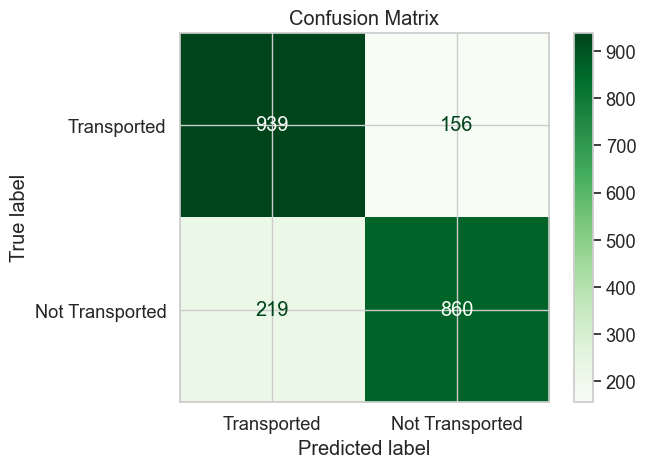

In [77]:
# Compute confusion matrix for the test set
confusion_matrix(y_test, model_valid_pred)
cnf_matrix = confusion_matrix(y_test, model_valid_pred, labels=[1,0])
print(cnf_matrix)

# Plot confusion matrix
labels = ['Transported', 'Not Transported']
disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix, display_labels=labels)
disp.plot(cmap='Greens')

# Displaying the Confusion matrix plot
plt.title('Confusion Matrix')
plt.show()

The confusion matrix displays the results in a visual form. The confusion matrix can be used to evaluate model performance on test data (test sets) by comparing the model's predicted results with actual values. In this case, the model is used to predict whether a person will be transported or not. The confusion matrix shows the amount of data that the model correctly or incorrectly classified. The results of the confusion matrix are displayed in the form of tables and visualizations.

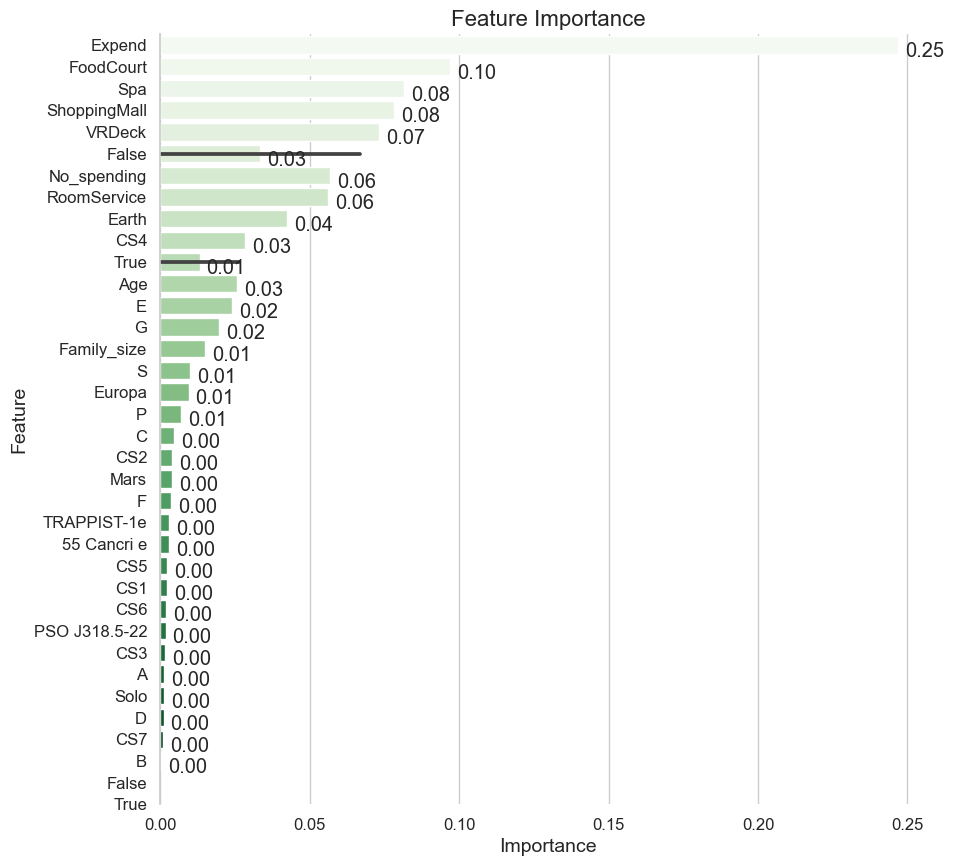

In [78]:
# Create a dataframe of feature importance
feature_imp = pd.DataFrame(model.feature_importances_, x_train.columns, columns=['Importance'])

# Filter out importance levels that equal 0 and sort by descending
feature_imp = feature_imp[feature_imp['Importance'] != 0]\
                            .sort_values('Importance', ascending = False)

# Create a bar chart of feature importance
fig, ax = plt.subplots(figsize = (10, 10))
ax = sns.barplot(data    = feature_imp,
                 x       = 'Importance',
                 y       = feature_imp.index,
                 orient  = 'h',
                 palette = 'Greens')

# Add labels to the bar chart
for p in ax.patches:    
    ax.annotate("%.2f" % p.get_width(), 
                   (p.get_x() + p.get_width(), 
                    p.get_y()), 
                    xytext=(5, -15), 
                    textcoords='offset points')

# Add axis labels and a title
ax.set_yticks(np.arange(len(feature_imp)))
ax.set_yticklabels(feature_imp.index, fontsize=14)
ax.set_xlabel('Importance', fontsize=14)
ax.set_ylabel('Feature', fontsize=14)
ax.set_title('Feature Importance', fontsize=16)

# Remove unnecessary spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.tick_params(axis='both', which='major', labelsize=12)

plt.show()


# feature_imp

This code is used to visualize the level of importance (importance) of each feature on the predictions of transported and not transported in a model. This visualization is described in the form of a bar chart showing the order of feature importance from highest to lowest. The results show that the total Expenditure feature is the most important feature in predicting whether someone will be transported or not, followed by the FoodCourt and Spa features. While the less important features in this prediction are CS7, x4_Z, No_spending, VIP_False and VIP_True. This visualization can assist business owners in identifying the factors that influence consumer decisions in using transportation services.

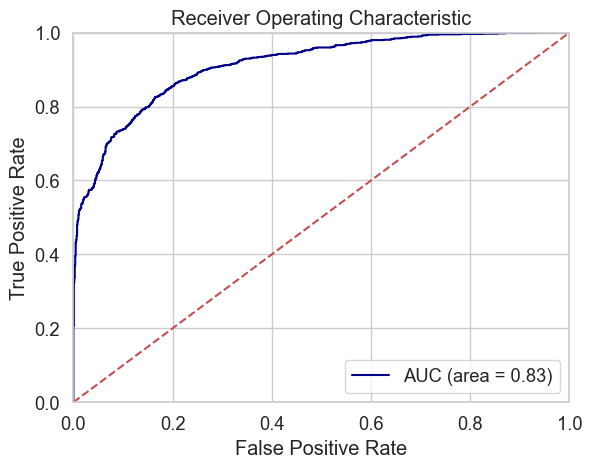

In [79]:
# Plot ROC curve
Gbm_roc_auc = roc_auc_score(y_test, model.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(x_test)[:,1])
plt.plot(fpr, tpr, 'darkblue', label = 'AUC (area = %0.2f)' % Gbm_roc_auc) 
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.show()


The above graph shows that the ROC plot may be a plot that shows the connection between the truth Positive Rate (TPR) and therefore the False Positive Rate (FPR) by changing the edge within the model. TPR is the proportion of true positives to the entire number of positive cases, while FPR is that the proportion of false positives to the entire number of negative cases. The ROC plot is generated from the TPR and FPR values which are calculated using the anticipated probability value of the model for every class. The closer the AUC is to 1, the higher the model performs in discriminating between different classes. The ROC plot also can be wont to determine the optimal threshold value to maximize model performance. ROC (Receiver Operating Characteristic) may be a curve that describes the performance of a classification model in distinguishing between positive and negative classes. Meanwhile, AUC (Area Under the Curve) is an evaluation metric that measures how well the model differentiates between positive and negative categories.

In [80]:
# Fitting the model to the training data
model.fit(X, y)

# Predicting on the training and validation sets
model_train_pred = model.predict(X_test)


# Read the sample csv file
GBR=pd.read_csv("./sample_submission.csv")

# Predicting on the training and validation sets
GBR["Transported"]=model_train_pred

# Changing the binary to Boolean
GBR=GBR.replace({0:False, 1:True})

# Generate CSV as result of the model
GBR.to_csv("GBR.csv", index=False)

# Showing the results for the model predicted 
GBR.head()

PassengerId  Transported
0     0013_01         True
1     0018_01        False
2     0019_01         True
3     0021_01         True
4     0023_01         True

<Figure size 500x500 with 0 Axes>

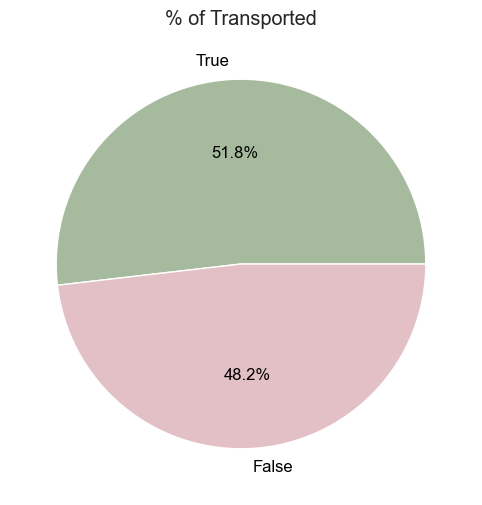

In [81]:
# Figure size
plt.figure(figsize=(5, 5))

# Set style to seaborn
sns.set_style("white")

# Create figure and set size
plt.figure(figsize=(8, 6))

# Set color palette
colors = ["#A6BB9D","#E2C0C5"]
labels = ['True', 'False']

# Create pie plot
GBR["Transported"].value_counts().plot.pie(
    labels = labels,
    autopct="%1.1f%%",
    textprops={"fontsize": 12, "color": "black"},
    colors=colors,
    ylabel=''
).set_title("% of Transported")

# Show plot
plt.show()

According to the GradientBoostingClassifier model that has been created, it is predicted that the majority of passengers in the testing dataset (52.1%) will be considered transported and the other 47.9% are not. Therefore, can be concluded from the accuracy and AUC score results on the model that achieves a relatively good and consistent level between the training and validation sets. Therefore, this model can be considered quite reliable to be used in predicting whether someone will be transported or not based on existing data. However, it should be noted that the prediction results from this model are only predictive and cannot fully describe the reality in the field. Therefore, the prediction results from this model need to be critically evaluated and used with careful consideration to avoid errors in decision-making.

#### RandomForestClassifier

RandomForestClassifier

The RandomForestClassifier is a machine learning algorithm capable of making predictions through decision trees. Basically the model trains different parts of the data by making decision trees of each of them and then those predictions are combined, making a final prediction. This model can be used to prevent overfitting and it also gives more accurate results (Donges, 2021).

In [82]:
# Instantiating the model object
rfc = RandomForestClassifier(random_state=123)


# Fitting the model to the training data
rfc.fit(x_train, y_train)

# Predicting on the training and validation sets
model_train_pred = rfc.predict(x_test)

print(classification_report(y_test, model_train_pred))


# Predict on the response variable
model_train_pred = rfc.predict(x_train)
model_valid_pred = rfc.predict(x_test)

# Score the results (accuracy)
model_train_score = rfc.score(x_train, y_train).round(4)
model_valid_score = rfc.score(x_test, y_test).round(4)

# Score the results (AUC)
model_train_auc = roc_auc_score(y_true=y_train, y_score=model_train_pred).round(4)
model_valid_auc = roc_auc_score(y_true=y_test, y_score=model_valid_pred).round(4)


# Score the results (AUC)
model_train_auc = roc_auc_score(y_true=y_train, y_score=model_train_pred).round(4)
model_valid_auc = roc_auc_score(y_true=y_test, y_score=model_valid_pred).round(4)

# displaying results
print('Training Accuracy:  ', model_train_score)
print('Validation Accuracy:', model_valid_score)
print('Training AUC:       ', model_train_auc)
print('Validation AUC:     ', model_valid_auc)




# Fitting the model to the training data
rfc.fit(X, y)

# Predicting on the training and validation sets
model_train_pred = rfc.predict(X_test)

# Read the sample csv file
RFC=pd.read_csv("./sample_submission.csv")

# Predicting on the training and validation sets
RFC["Transported"]=model_train_pred

# Changing the binary to Boolean
RFC=RFC.replace({0:False, 1:True})


# Generate CSV as result of the model
RFC.to_csv("RFC.csv", index=False)

              precision    recall  f1-score   support

           0       0.80      0.84      0.82      1079
           1       0.83      0.80      0.81      1095

    accuracy                           0.82      2174
   macro avg       0.82      0.82      0.82      2174
weighted avg       0.82      0.82      0.82      2174

Training Accuracy:   0.9982
Validation Accuracy: 0.8169
Training AUC:        0.9982
Validation AUC:      0.8171


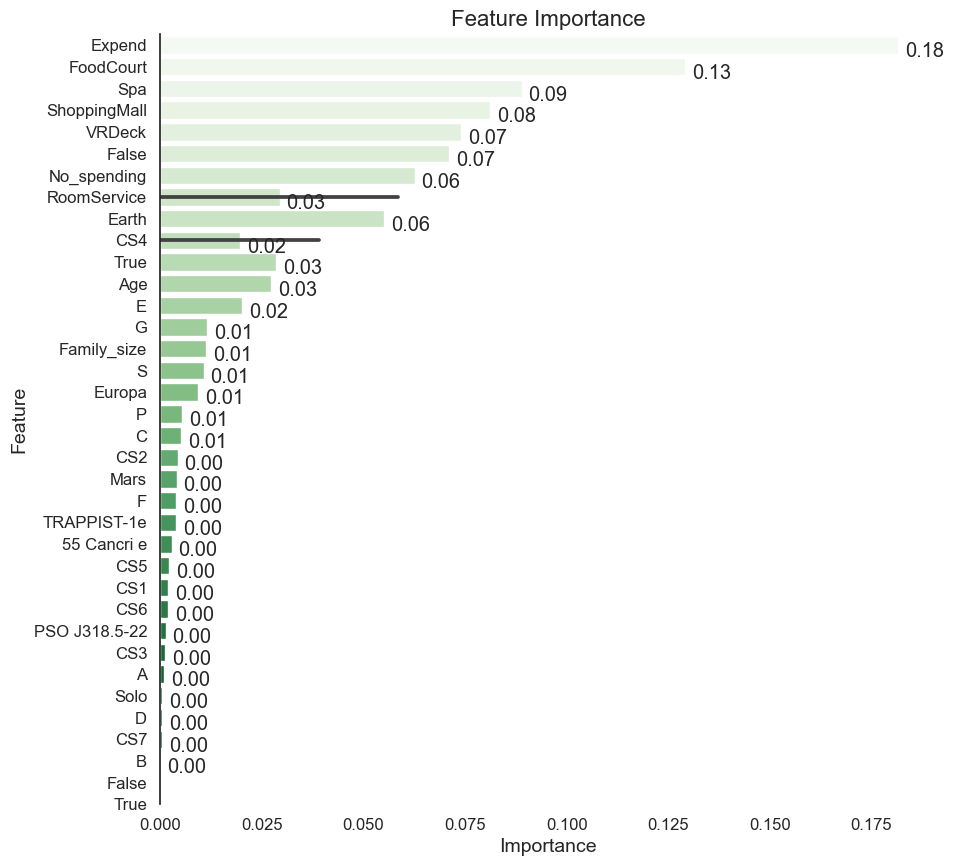

In [83]:
# Create a dataframe of feature importance
feature_imp_rfc = pd.DataFrame(model.feature_importances_, x_train.columns, columns=['Importance'])

# Filter out importance levels that equal 0 and sort by descending
feature_imp_rfc = feature_imp_rfc[feature_imp_rfc['Importance'] != 0]\
                            .sort_values('Importance', ascending = False)

# Create a bar chart of feature importance
fig, ax = plt.subplots(figsize = (10, 10))
ax = sns.barplot(data    = feature_imp_rfc,
                 x       = 'Importance',
                 y       = feature_imp_rfc.index,
                 orient  = 'h',
                 palette = 'Greens')

# Add labels to the bar chart
for p in ax.patches:    
    ax.annotate("%.2f" % p.get_width(), 
                   (p.get_x() + p.get_width(), 
                    p.get_y()), 
                    xytext=(5, -15), 
                    textcoords='offset points')

# Add axis labels and a title
ax.set_yticks(np.arange(len(feature_imp_rfc)))
ax.set_yticklabels(feature_imp.index, fontsize=14)
ax.set_xlabel('Importance', fontsize=14)
ax.set_ylabel('Feature', fontsize=14)
ax.set_title('Feature Importance', fontsize=16)

# Remove unnecessary spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.tick_params(axis='both', which='major', labelsize=12)

plt.show()

<Figure size 500x500 with 0 Axes>

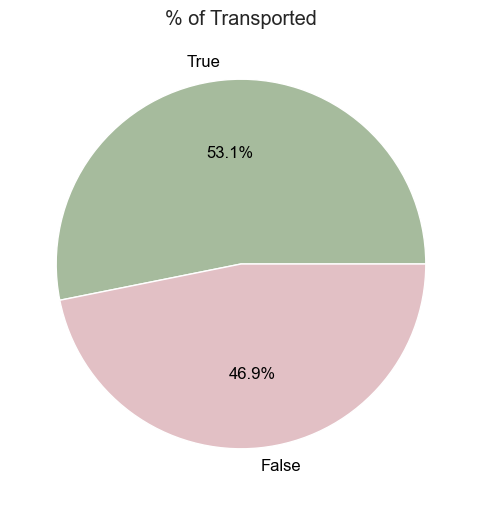

In [84]:
# Figure size
plt.figure(figsize=(5, 5))

# Set style to seaborn
sns.set_style("white")

# Create figure and set size
plt.figure(figsize=(8, 6))

# Set color palette
colors = ["#A6BB9D","#E2C0C5"]
labels = ['True', 'False']

# Create pie plot
RFC["Transported"].value_counts().plot.pie(
    labels = labels,
    autopct="%1.1f%%",
    textprops={"fontsize": 12, "color": "black"},
    colors=colors,
    ylabel=''
).set_title("% of Transported")

# Show plot
plt.show()

#### LogisticRegression

LogisticRegression

LogisticRegression is a simple and commonly used machine learning algorithm used for binary classification tasks. It analyzes the relationship between the independent input variables and the binary outputs. The model calculates the probability of an event using a logistic function (Brownlee, 2020).

In [85]:
# Instantiating the model object
lr = LogisticRegression()


# Fitting the model to the training data
lr.fit(x_train, y_train)

# Predicting on the training and validation sets
model_train_pred = lr.predict(x_test)

print(classification_report(y_test, model_train_pred))


# Predict on the response variable
model_train_pred = lr.predict(x_train)
model_valid_pred = lr.predict(x_test)

# Score the results (accuracy)
model_train_score = lr.score(x_train, y_train).round(4)
model_valid_score = lr.score(x_test, y_test).round(4)

# Score the results (AUC)
model_train_auc = roc_auc_score(y_true=y_train, y_score=model_train_pred).round(4)
model_valid_auc = roc_auc_score(y_true=y_test, y_score=model_valid_pred).round(4)


# Score the results (AUC)
model_train_auc = roc_auc_score(y_true=y_train, y_score=model_train_pred).round(4)
model_valid_auc = roc_auc_score(y_true=y_test, y_score=model_valid_pred).round(4)

# displaying results
print('Training Accuracy:  ', model_train_score)
print('Validation Accuracy:', model_valid_score)
print('Training AUC:       ', model_train_auc)
print('Validation AUC:     ', model_valid_auc)






# Fitting the model to the training data
lr.fit(X, y)

# Predicting on the training and validation sets
model_train_pred = lr.predict(X_test)

# Read the sample csv file
LRM=pd.read_csv("./sample_submission.csv")

# Predicting on the training and validation sets
LRM["Transported"]=model_train_pred

# Changing the binary to Boolean
LRM=LRM.replace({0:False, 1:True})

# Generate CSV as result of the model
LRM.to_csv("LRM.csv", index=False)


# Fitting the model to the training data
lr.fit(x_train, y_train)

# Predicting on the training and validation sets
model_train_pred = lr.predict(x_test)

print(classification_report(y_test, model_train_pred))


# Predict on the response variable
model_train_pred = lr.predict(x_train)
model_valid_pred = lr.predict(x_test)

# Score the results (accuracy)
model_train_score = lr.score(x_train, y_train).round(4)
model_valid_score = lr.score(x_test, y_test).round(4)

# Score the results (AUC)
model_train_auc = roc_auc_score(y_true=y_train, y_score=model_train_pred).round(4)
model_valid_auc = roc_auc_score(y_true=y_test, y_score=model_valid_pred).round(4)


# Score the results (AUC)
model_train_auc = roc_auc_score(y_true=y_train, y_score=model_train_pred).round(4)
model_valid_auc = roc_auc_score(y_true=y_test, y_score=model_valid_pred).round(4)

# displaying results
print('Training Accuracy:  ', model_train_score)
print('Validation Accuracy:', model_valid_score)
print('Training AUC:       ', model_train_auc)
print('Validation AUC:     ', model_valid_auc)






# Fitting the model to the training data
lr.fit(X, y)

# Predicting on the training and validation sets
model_train_pred = lr.predict(X_test)

# Read the sample csv file
LRM=pd.read_csv("./sample_submission.csv")

# Predicting on the training and validation sets
LRM["Transported"]=model_train_pred

# Changing the binary to Boolean
LRM=LRM.replace({0:False, 1:True})

# Generate CSV as result of the model
LRM.to_csv("LRM.csv", index=False)

              precision    recall  f1-score   support

           0       0.80      0.74      0.77      1079
           1       0.76      0.82      0.79      1095

    accuracy                           0.78      2174
   macro avg       0.78      0.78      0.78      2174
weighted avg       0.78      0.78      0.78      2174

Training Accuracy:   0.7802
Validation Accuracy: 0.7815
Training AUC:        0.7801
Validation AUC:      0.7812
              precision    recall  f1-score   support

           0       0.80      0.74      0.77      1079
           1       0.76      0.82      0.79      1095

    accuracy                           0.78      2174
   macro avg       0.78      0.78      0.78      2174
weighted avg       0.78      0.78      0.78      2174

Training Accuracy:   0.7802
Validation Accuracy: 0.7815
Training AUC:        0.7801
Validation AUC:      0.7812


<Figure size 500x500 with 0 Axes>

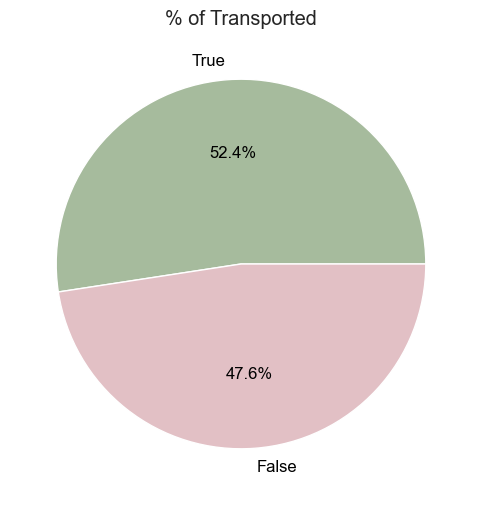

In [86]:
# Figure size
plt.figure(figsize=(5, 5))

# Set style to seaborn
sns.set_style("white")

# Create figure and set size
plt.figure(figsize=(8, 6))

# Set color palette
colors = ["#A6BB9D","#E2C0C5"]
labels = ['True', 'False']

# Create pie plot
LRM["Transported"].value_counts().plot.pie(
    labels = labels,
    autopct="%1.1f%%",
    textprops={"fontsize": 12, "color": "black"},
    colors=colors,
    ylabel=''
).set_title("% of Transported")

# Show plot
plt.show()

#### Linear Preceptron

Linear Preceptron

The Linear Perceptron is a type of artificial neural network algorithm that predicts binary outputs. It uses a training algorithm that weighs the inputs and adds them together to get a net input value. Those weights are adjusted/updated during the training to minimize errors (Banoula, 2023).

In [87]:
# Instantiating the model object
p = Perceptron()


# Fitting the model to the training data
p.fit(x_train, y_train)

# Predicting on the training and validation sets
model_train_pred = p.predict(x_test)

print(classification_report(y_test, model_train_pred))


# Predict on the response variable
model_train_pred = p.predict(x_train)
model_valid_pred = p.predict(x_test)

# Score the results (accuracy)
model_train_score = p.score(x_train, y_train).round(4)
model_valid_score = p.score(x_test, y_test).round(4)

# Score the results (AUC)
model_train_auc = roc_auc_score(y_true=y_train, y_score=model_train_pred).round(4)
model_valid_auc = roc_auc_score(y_true=y_test, y_score=model_valid_pred).round(4)


# Score the results (AUC)
model_train_auc = roc_auc_score(y_true=y_train, y_score=model_train_pred).round(4)
model_valid_auc = roc_auc_score(y_true=y_test, y_score=model_valid_pred).round(4)

# displaying results
print('Training Accuracy:  ', model_train_score)
print('Validation Accuracy:', model_valid_score)
print('Training AUC:       ', model_train_auc)
print('Validation AUC:     ', model_valid_auc)


# Fitting the model to the training data
p.fit(X, y)

# Predicting on the training and validation sets
model_train_pred = p.predict(X_test)

# Read the sample csv file
PM =pd.read_csv("./sample_submission.csv")

# Predicting on the training and validation sets
PM["Transported"]=model_train_pred

# Changing the binary to Boolean
PM=PM.replace({0:False, 1:True})

# Generate CSV as result of the model
PM.to_csv("PM.csv", index=False)

              precision    recall  f1-score   support

           0       0.64      0.96      0.76      1079
           1       0.92      0.46      0.61      1095

    accuracy                           0.71      2174
   macro avg       0.78      0.71      0.69      2174
weighted avg       0.78      0.71      0.69      2174

Training Accuracy:   0.6964
Validation Accuracy: 0.707
Training AUC:        0.6983
Validation AUC:      0.7088


<Figure size 500x500 with 0 Axes>

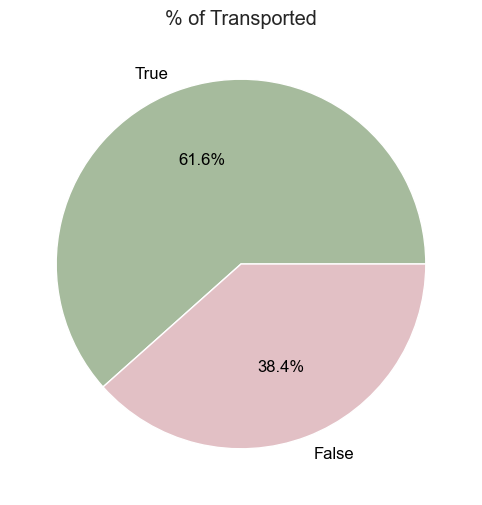

In [88]:
# Figure size
plt.figure(figsize=(5, 5))

# Set style to seaborn
sns.set_style("white")

# Create figure and set size
plt.figure(figsize=(8, 6))

# Set color palette
colors = ["#A6BB9D","#E2C0C5"]
labels = ['True', 'False']

# Create pie plot
PM["Transported"].value_counts().plot.pie(
    labels = labels,
    autopct="%1.1f%%",
    textprops={"fontsize": 12, "color": "black"},
    colors=colors,
    ylabel=''
).set_title("% of Transported")

# Show plot
plt.show()

<b> Solution to Sub Problem 2 </b>

After the models shown above were run, the best option was selected to predict the transported feature for the testing set. The model was tested and an accuracy of 80.75% was achieved.


## Solving Sub Problem 3 - What to do next?

In [89]:
y = y.astype(bool)
titanic_df["Transported Train"] = y

titanic_final = pd.merge(
    titanic_df, GBR, left_on="PassengerId", right_on="PassengerId", how="left"
)

titanic_final["Final Transported"] = titanic_final[
    ["Transported Train", "Transported"]
].any(axis="columns")

titanic_final = titanic_final.drop(titanic_final.columns[[-2, -3]], axis=1)

titanic_final.head()

PassengerId HomePlanet CryoSleep  Destination   Age    VIP  RoomService  \
0     0001_01     Europa     False  TRAPPIST-1e  39.0  False          0.0   
1     0002_01      Earth     False  TRAPPIST-1e  24.0  False        109.0   
2     0003_01     Europa     False  TRAPPIST-1e  58.0   True         43.0   
3     0003_02     Europa     False  TRAPPIST-1e  33.0  False          0.0   
4     0004_01      Earth     False  TRAPPIST-1e  16.0  False        303.0   

   FoodCourt  ShoppingMall     Spa  ...  Cabin_side  CS1 CS2  CS3  CS4  CS5  \
0        0.0           0.0     0.0  ...           P    1   0    0    0    0   
1        9.0          25.0   549.0  ...           S    1   0    0    0    0   
2     3576.0           0.0  6715.0  ...           S    1   0    0    0    0   
3     1283.0         371.0  3329.0  ...           S    1   0    0    0    0   
4       70.0         151.0   565.0  ...           S    1   0    0    0    0   

   CS6 CS7  Family_size Final Transported  
0    0   0            4             False  
1    0   0            4              True  
2    0   0            7             False  
3    0   0            7             False  
4    0   0            9              True  

[5 rows x 29 columns]

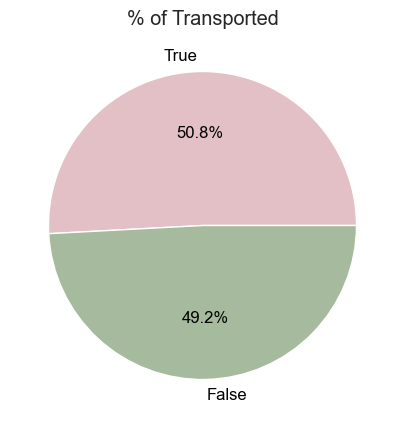

In [90]:
# Set style to seaborn
sns.set_style("white")

# Create figure and set size
plt.figure(figsize=(5, 5))

# Set color palette
colors = ["#E2C0C5","#A6BB9D"]
labels = ['True', 'False']

# Create pie plot
titanic_final["Final Transported"].value_counts().plot.pie(
    labels = labels,
    autopct="%1.1f%%",
    textprops={"fontsize": 12, "color": "black"},
    colors=colors,
    ylabel=''
).set_title("% of Transported")

# Show plot
plt.show()

<AxesSubplot:xlabel='Cabin_deck', ylabel='Final Transported'>

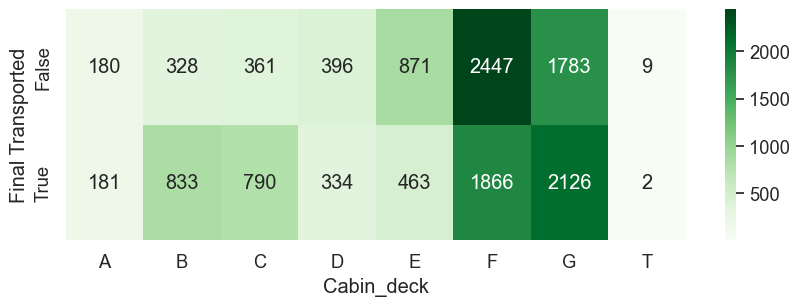

In [91]:
# Joint distribution of HomePlanet and Destination
deck_allocation = titanic_final.groupby(['Cabin_deck','Final Transported'])['Final Transported'].size().unstack().fillna(0)

# Heatmap 
plt.figure(figsize=(10,3))
sns.heatmap(deck_allocation.T, 
            annot=True, 
            fmt='g', 
            cmap='Greens')

#### Insights about the graph:
- The lower the deck is the biggest amount of transported people.
- G deck (the biggest amount of transported passengers) is not the deck with the biggest amount of passengers


<AxesSubplot:xlabel='Cabin_side', ylabel='Final Transported'>

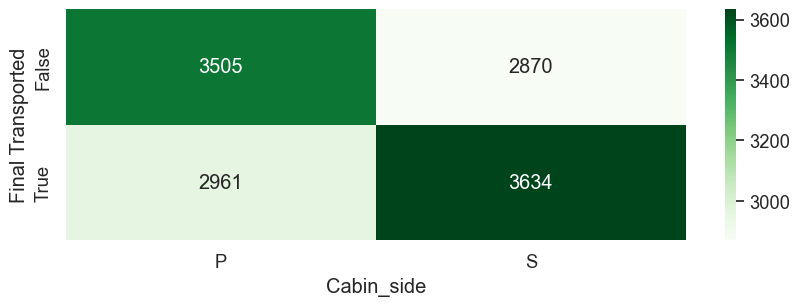

In [92]:
# Joint distribution of HomePlanet and Destination
side_allocation = titanic_final.groupby(['Cabin_side','Final Transported'])['Final Transported'].size().unstack().fillna(0)

# Heatmap of missing values
plt.figure(figsize=(10,3))
sns.heatmap(side_allocation.T, 
            annot=True, 
            fmt='g', 
            cmap='Greens')

In [93]:
# Display Transverse Amidship Section Of Titanic

from IPython.display import Image, HTML, display

img_D = 'https://www.ggarchives.com/DigitalAssets/Books/LossOfTheSteamshipTitanic/1912/89-TransverseAmidshipSectionOfTitanic-500.jpg?ezimgfmt=ng:webp/ngcb1'

display(HTML("<table><tr><td><img src='" + img_D + "'></td></tr></table>"))

print("Image 4:Transverse Amidship Section Of Titanic: White Star Line - White Star Line publicity material (White Star Line, n.d.-a)")

Image 4:Transverse Amidship Section Of Titanic: White Star Line - White Star Line publicity material (White Star Line, n.d.-a)


#### Insights about the graph:

- The analysis indicates that individuals situated on the "S" side of the ship have a higher probability of being transported.

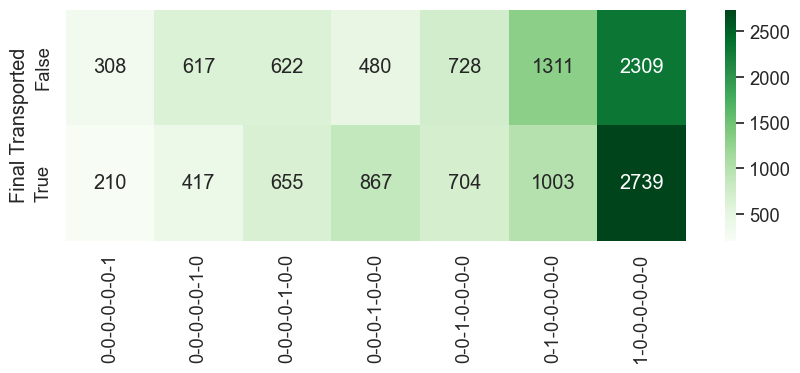

In [94]:
# Joint distribution of HomePlanet and Destination
cs_allocation = titanic_final.groupby(['CS1','CS2','CS3','CS4','CS5','CS6','CS7', 'Final Transported'])['Final Transported'].size().unstack().fillna(0)

# Heatmap of missing values
plt.figure(figsize=(10,3))
sns.heatmap(cs_allocation.T, 
            annot=True,
            fmt='g',
            cmap='Greens')
plt.gca().set_xlabel('')
plt.show()

In [95]:
titanic_final.groupby(['CS1','CS2','CS3','CS4','CS5','CS6','CS7']).agg({'Final Transported': ['count']}).reset_index()

CS1 CS2 CS3 CS4 CS5 CS6 CS7 Final Transported
                                          count
0   0   0   0   0   0   0   1               518
1   0   0   0   0   0   1   0              1034
2   0   0   0   0   1   0   0              1277
3   0   0   0   1   0   0   0              1347
4   0   0   1   0   0   0   0              1432
5   0   1   0   0   0   0   0              2314
6   1   0   0   0   0   0   0              5048

#### Insight about graph:.
- Although cabin section 1 has the biggest amount of people being transported, the highest percentage of transported people is in the cabin section 4.
- Following the image below we may assume that cabin section 4 was located in the same section as the engines and turbines.



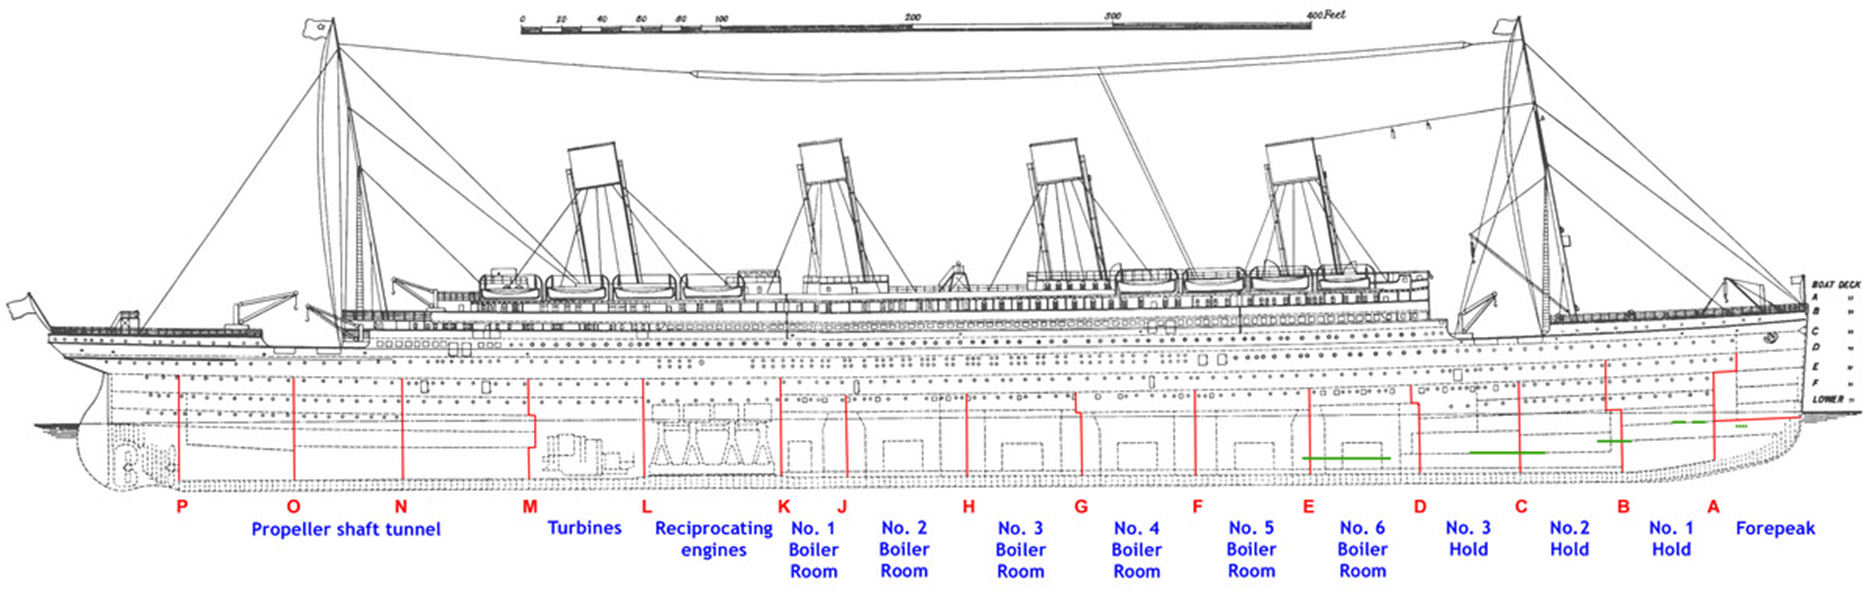

<b> Solution to Sub Problem 3 </b>

While on its way to its first destination, 55 Cancri E, the Spaceship encountered a dust cloud containing a spacetime anomaly that caused nearly half of the passengers to be transported to an alternate dimension.

Our analysis shows that the location where people are more likely to be transported in the lowest deck G, cabin section 4. Additionally, we know that the turbines and engines are located under Deck G in cabin section 4, which suggests that proximity to the engines may have increased the likelihood of being transported. 

Therefore, it is possible that the anomaly entered the Spaceship through its turbines and engines section, causing the area above it (Deck G, Section 4) to be primarily affected.

# References


Kurama, V. (2021, April 9). Gradient Boosting for Classification | Paperspace Blog. Paperspace Blog. 
    https://blog.paperspace.com/gradient-boosting-for-classification/

Brownlee, J. (2020, August 14). Logistic Regression for Machine Learning. MachineLearningMastery.com.
    https://machinelearningmastery.com/logistic-regression-for-machine-learning/

Donges, N. (2021, July 22). Random Forest Classifier: A Complete Guide to How It Works in Machine Learning. Built In.
    https://builtin.com/data-science/random-forest-algorithm
    
Banoula, M. (2023, February 16). What is Perceptron: A Beginners Guide for Perceptron. Simplilearn.com.
    https://www.simplilearn.com/tutorials/deep-learning-tutorial/perceptron
    
scikit-learn Org. (n.d.). API Reference. Scikit-learn. 
    https://scikit-learn.org/stable/modules/classes